In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics
import sklearn.model_selection
import pandas as pd
import numpy as np
import sklearn.tree
import sklearn.metrics
import sklearn.model_selection
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We import datasets contain the stock price from Kering the company we will study and its 2 main competitors Hermes and LVMH

In [ ]:
#We import the 3 different datasets and display to make sure everything it's okay
df1 = pd.read_csv('/content/drive/MyDrive/DataFinalProject/historicaldata/historicaldata/LVMH.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DataFinalProject/historicaldata/historicaldata/PRTP.csv')
df3 = pd.read_csv('/content/drive/MyDrive/DataFinalProject/historicaldata/historicaldata/HRMS.csv')
display(df1, df2, df3)

Date  Price   Open   High    Low     Vol. Change %
0     11/05/2024  602.6  610.6  610.8  599.3  310.73K   -0.68%
1     11/04/2024  606.7  611.0  618.8  606.3  239.75K   -0.70%
2     11/01/2024  611.0  610.7  614.1  608.4  263.33K    0.20%
3     10/31/2024  609.8  615.0  617.3  605.3  525.31K   -1.34%
4     10/30/2024  618.1  624.1  625.9  608.6  536.64K   -2.03%
...          ...    ...    ...    ...    ...      ...      ...
2560         NaN    NaN    NaN    NaN    NaN      NaN      NaN
2561         NaN    NaN    NaN    NaN    NaN      NaN      NaN
2562         NaN    NaN    NaN    NaN    NaN      NaN      NaN
2563         NaN    NaN    NaN    NaN    NaN      NaN      NaN
2564         NaN    NaN    NaN    NaN    NaN      NaN      NaN

[2565 rows x 7 columns]

Date   Price    Open    High     Low     Vol. Change %
0     11/05/2024  230.75  235.70  237.05  228.30  175.58K   -1.26%
1     11/04/2024  233.70  230.70  237.45  230.20  198.59K    1.30%
2     11/01/2024  230.70  227.95  232.15  227.25  144.69K    0.81%
3     10/31/2024  228.85  229.00  231.25  228.00  253.07K   -0.28%
4     10/30/2024  229.50  235.00  235.60  225.85  458.11K   -3.23%
...          ...     ...     ...     ...     ...      ...      ...
1282  11/06/2019  522.10  526.40  526.90  520.50  145.66K   -0.70%
1283  11/05/2019  525.80  525.50  526.70  520.00  164.15K    0.06%
1284  11/04/2019  525.50  517.60  527.50  516.10  279.58K    2.04%
1285  11/01/2019  515.00  511.30  519.20  511.20  152.66K    0.94%
1286         NaN     NaN     NaN     NaN     NaN      NaN      NaN

[1287 rows x 7 columns]

Date     Price      Open      High       Low    Vol. Change %
0     11/05/2024  2,079.00  2,080.00  2,085.00  2,054.00  49.54K    0.39%
1     11/04/2024  2,071.00  2,078.00  2,111.00  2,065.00  36.83K   -0.48%
2     11/01/2024  2,081.00  2,071.00  2,090.00  2,069.00  34.61K    0.34%
3     10/31/2024  2,074.00  2,094.00  2,107.00  2,056.00  69.15K   -1.43%
4     10/30/2024  2,104.00  2,110.00  2,125.00  2,073.00  64.76K   -1.31%
...          ...       ...       ...       ...       ...     ...      ...
2560         NaN       NaN       NaN       NaN       NaN     NaN      NaN
2561         NaN       NaN       NaN       NaN       NaN     NaN      NaN
2562         NaN       NaN       NaN       NaN       NaN     NaN      NaN
2563         NaN       NaN       NaN       NaN       NaN     NaN      NaN
2564         NaN       NaN       NaN       NaN       NaN     NaN      NaN

[2565 rows x 7 columns]

In [ ]:
#We look at the dtype of each column
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1286 non-null   object 
 1   Price     1286 non-null   float64
 2   Open      1286 non-null   float64
 3   High      1286 non-null   float64
 4   Low       1286 non-null   float64
 5   Vol.      1285 non-null   object 
 6   Change %  1286 non-null   object 
dtypes: float64(4), object(3)
memory usage: 140.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1286 non-null   object 
 1   Price     1286 non-null   float64
 2   Open      1286 non-null   float64
 3   High      1286 non-null   float64
 4   Low       1286 non-null   float64
 5   Vol.      1285 non-null   object 
 6   Change %  1286 non-null   object 
dtypes: float64(4), object(3)
me

We encounter a problem because our df2 is only categorized in object, however we need it to be float

In [ ]:
#We remarked a problem because of a coma in the column price of df2, therefore we replace it and transform the dtype in float
df3['Price'] = df3['Price'].str.replace(',', '').astype(float)

#We ensure the date column is in the right format
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

#We sort the datas by the date
df1 = df1.sort_values(by='Date')
df2 = df2.sort_values(by='Date')
df3 = df3.sort_values(by='Date')

df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')
df2['Price'] = pd.to_numeric(df2['Price'], errors='coerce')
df3['Price'] = pd.to_numeric(df3['Price'], errors='coerce')

#We remove rows with NaN values in the 'Price' column
df1 = df1.dropna(subset=['Price'])
df2 = df2.dropna(subset=['Price'])
df3 = df3.dropna(subset=['Price'])

print(df2.head)

<bound method NDFrame.head of            Date   Price    Open    High     Low     Vol. Change %
1285 2019-11-01  515.00  511.30  519.20  511.20  152.66K    0.94%
1284 2019-11-04  525.50  517.60  527.50  516.10  279.58K    2.04%
1283 2019-11-05  525.80  525.50  526.70  520.00  164.15K    0.06%
1282 2019-11-06  522.10  526.40  526.90  520.50  145.66K   -0.70%
1281 2019-11-07  524.10  525.90  527.70  522.80  167.96K    0.38%
...         ...     ...     ...     ...     ...      ...      ...
4    2024-10-30  229.50  235.00  235.60  225.85  458.11K   -3.23%
3    2024-10-31  228.85  229.00  231.25  228.00  253.07K   -0.28%
2    2024-11-01  230.70  227.95  232.15  227.25  144.69K    0.81%
1    2024-11-04  233.70  230.70  237.45  230.20  198.59K    1.30%
0    2024-11-05  230.75  235.70  237.05  228.30  175.58K   -1.26%

[1286 rows x 7 columns]>


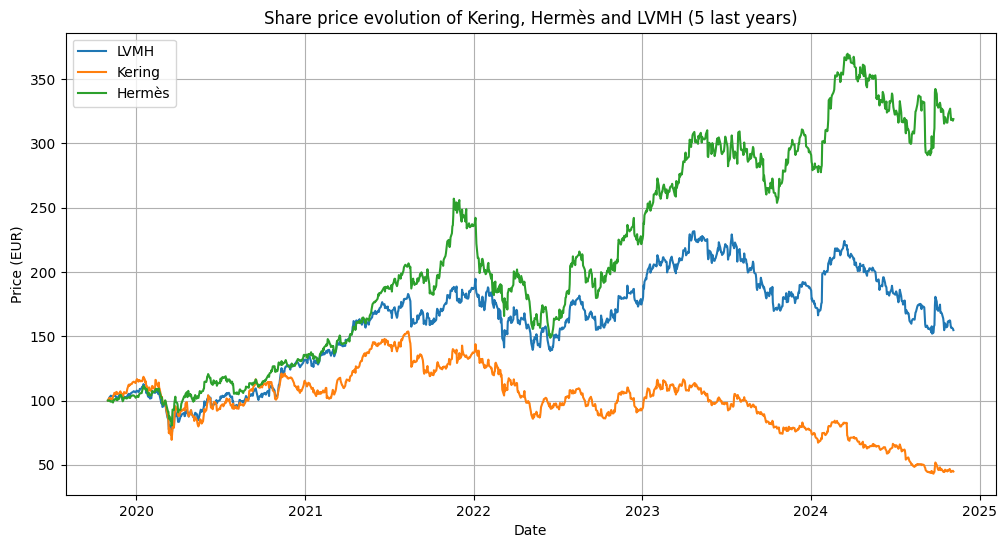

In [ ]:
#Convert all price to a Base 100
df1['Base100'] = df1['Price'] / df1['Price'].iloc[0] * 100  # LVMH
df2['Base100'] = df2['Price'] / df2['Price'].iloc[0] * 100  # Kering
df3['Base100'] = df3['Price'] / df3['Price'].iloc[0] * 100  # Hermès

# We plot the 3 different curves to look at the trend since 5 years
plt.figure(figsize=(12, 6))

plt.plot(df1['Date'], df1['Base100'], label='LVMH')
plt.plot(df2['Date'], df2['Base100'], label='Kering')
plt.plot(df3['Date'], df3['Base100'], label='Hermès')

plt.title("Share price evolution of Kering, Hermès and LVMH (5 last years)")
plt.xlabel("Date")
plt.ylabel("Price (EUR)")
plt.legend()
plt.grid(True)

plt.show()

As we can see, the luxury sector has known a huge growth in the last 5 years but faced a more complicated period since 2 years. However, Kering has been the most affected, we try to understand why

To do so, we try to identificate different variable that could explain this difficulties.

Hypothesis :
 - Kering has suffered from the recent depreciation of JPY, because of the loss in purchasing power of Japanese ==> We will try to verify that with the relation with EURJPY
 - Kering is very correlated with the Japan market ==> Relation with NKY
 - Kering biggest market is China and is dependant from the economic growth of the country ==> Relation with CSI
 - Kering has suffered from a large increase in the price of commodities, that could have lower their margins ==> Relations with silver and gold
 - Kering main markets are located in Europe, North America and East Asia


**Linear Regressions**

In [ ]:
import pandas_datareader as pdr
import yfinance as yf
from datetime import datetime

#Dates
start = datetime(2019, 11, 1)
end = datetime(2024, 11, 5)

#Import the datas we think pertinent
eur_usd = yf.download('EURUSD=X', start=start, end=end)['Close']
eur_jpy = yf.download('EURJPY=X', start=start, end=end)['Close']
eur_cny = yf.download('EURCNY=X', start=start, end=end)['Close']

euro_10yr_yield = pdr.get_data_fred('IRLTLT01EZM156N', start=start, end=end)
japan_10yr_yield = pdr.get_data_fred('IRLTLT01JPM156N', start=start, end=end)
us_10yr_yield = pdr.get_data_fred('DGS10', start=start, end=end)
china_10yr_yield = yf.download('CN10Y.BE', start=start, end=end)['Close']

csi_300 = yf.download('000300.SS', start=start, end=end)['Close']
sp500 = yf.download('^GSPC', start=start, end=end)['Close']  # S&P 500
eurostoxx_50 = yf.download('^STOXX50E', start=start, end=end)['Close']  # Eurostoxx 50
nikkei = yf.download('^N225', start=start, end=end)['Close']  # Nikkei 225
kospi = yf.download('^KS11', start=start, end=end)['Close']
hsi = yf.download('^HSI', start=start, end=end)['Close']
ftse_100 = yf.download('^FTSE', start=start, end=end)['Close']
ibex = yf.download('^IBEX', start=start, end=end)['Close']
ftse_mib = yf.download('FTSEMIB.MI', start=start, end=end)['Close']
ibovespa = yf.download('^BVSP', start=start, end=end)['Close']
dax = yf.download('^GDAXI', start=start, end=end)['Close']
smi = yf.download('^SSMI', start=start, end=end)['Close']
nifty_50 = yf.download('^NSEI', start=start, end=end)['Close']

silver_price = yf.download('SI=F', start=start, end=end)['Close']  # Prix de l'argent
gold_price = yf.download('GC=F', start=start, end=end)['Close']  # Prix de l'or

consumer_confidence = yf.download('PSY', start=start, end=end)['Close']
retail_sales = yf.download('XRT', start=start, end=end)['Close']
euro_inflation = pdr.get_data_fred('CP0000EZ19M086NEST', start=start, end=end)
us_inflation = pdr.get_data_fred('CPIAUCSL', start=start, end=end)
japan_inflation = yf.download('1345.T', start=start, end=end)['Close']
china_inflation = yf.download('3188.HK', start=start, end=end)['Close']

print(eur_usd.head(), eur_jpy.head(), eur_cny.head(), euro_10yr_yield.head(), japan_10yr_yield.head(), us_10yr_yield.head(), china_10yr_yield.head(), csi_300.head(), sp500.head())
print(eurostoxx_50.head(), nikkei.head(), kospi.head(), hsi.head(), silver_price.head(), gold_price.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CN10Y.BE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%**************

Ticker                     EURUSD=X
Date                               
2019-11-01 00:00:00+00:00  1.115710
2019-11-04 00:00:00+00:00  1.116657
2019-11-05 00:00:00+00:00  1.112855
2019-11-06 00:00:00+00:00  1.107420
2019-11-07 00:00:00+00:00  1.107040 Ticker                       EURJPY=X
Date                                 
2019-11-01 00:00:00+00:00  120.496002
2019-11-04 00:00:00+00:00  120.836998
2019-11-05 00:00:00+00:00  120.947998
2019-11-06 00:00:00+00:00  120.869003
2019-11-07 00:00:00+00:00  120.565002 Ticker                     EURCNY=X
Date                               
2019-11-01 00:00:00+00:00    7.8433
2019-11-04 00:00:00+00:00    7.8488
2019-11-05 00:00:00+00:00    7.8131
2019-11-06 00:00:00+00:00    7.7522
2019-11-07 00:00:00+00:00    7.7370             IRLTLT01EZM156N
DATE                       
2019-11-01         0.301606
2019-12-01         0.366249
2020-01-01         0.316187
2020-02-01         0.133331
2020-03-01         0.368176             IRLTLT01JPM156N
DATE  

In [ ]:
#We export the datas as CSV
eur_usd.to_csv('eur_usd.csv')
eur_jpy.to_csv('eur_jpy.csv')
eur_cny.to_csv('eur_cny.csv')

euro_10yr_yield.to_csv('euro_10yr_yield.csv')
japan_10yr_yield.to_csv('japan_10yr_yield.csv')
us_10yr_yield.to_csv('us_10yr_yield.csv')

euro_inflation.to_csv('euro_inflation.csv')
us_inflation.to_csv('us_inflation.csv')
japan_inflation.to_csv('japan_inflation.csv')
china_inflation.to_csv('china_inflation.csv')

csi_300.to_csv('csi_300.csv')
sp500.to_csv('sp500.csv')
eurostoxx_50.to_csv('eurostoxx_50.csv')
nikkei.to_csv('nikkei.csv')
kospi.to_csv('kospi.csv')
hsi.to_csv('hsi.csv')
ftse_100.to_csv('ftse_100.csv')
ibex.to_csv('ibex.csv')
ftse_mib.to_csv('ftse_mib.csv')
ibovespa.to_csv('ibovespa.csv')
dax.to_csv('dax.csv')
smi.to_csv('smi.csv')
nifty_50.to_csv('nifty_50.csv')
consumer_confidence.to_csv('consumer_confidence.csv')
retail_sales.to_csv('retail_sales.csv')

silver_price.to_csv('silver_price.csv')
gold_price.to_csv('gold_price.csv')

In [ ]:
eur_usd.index = pd.to_datetime(eur_usd.index)
df2.set_index('Date', inplace=True)

#To have all the datas indexed on the same dates, we put the time zone at 0
df2.index = df2.index.tz_localize(None)
eur_usd.index = eur_usd.index.tz_localize(None)
eur_jpy.index = eur_jpy.index.tz_localize(None)
eur_cny.index = eur_cny.index.tz_localize(None)

euro_10yr_yield.index = euro_10yr_yield.index.tz_localize(None)
japan_10yr_yield.index = japan_10yr_yield.index.tz_localize(None)
us_10yr_yield.index = us_10yr_yield.index.tz_localize(None)
china_10yr_yield.index = china_10yr_yield.index.tz_localize(None)

hsi.index = hsi.index.tz_localize(None)
kospi.index = kospi.index.tz_localize(None)
csi_300.index = csi_300.index.tz_localize(None)
sp500.index = sp500.index.tz_localize(None)
eurostoxx_50.index = eurostoxx_50.index.tz_localize(None)
nikkei.index = nikkei.index.tz_localize(None)
ftse_100.index = ftse_100.index.tz_localize(None)
ibex.index = ibex.index.tz_localize(None)
ftse_mib.index = ftse_mib.index.tz_localize(None)
ibovespa.index = ibovespa.index.tz_localize(None)
dax.index = dax.index.tz_localize(None)
smi.index = smi.index.tz_localize(None)
nifty_50.index = nifty_50.index.tz_localize(None)

consumer_confidence.index = consumer_confidence.index.tz_localize(None)
retail_sales.index = retail_sales.index.tz_localize(None)

euro_inflation.index = euro_inflation.index.tz_localize(None)
us_inflation.index = us_inflation.index.tz_localize(None)
japan_inflation.index = japan_inflation.index.tz_localize(None)

silver_price.index = silver_price.index.tz_localize(None)
gold_price.index = gold_price.index.tz_localize(None)

In [ ]:
print(df2.index, eur_usd.index)

DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14',
               ...
               '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-28',
               '2024-10-29', '2024-10-30', '2024-10-31', '2024-11-01',
               '2024-11-04', '2024-11-05'],
              dtype='datetime64[ns]', name='Date', length=1286, freq=None) DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14',
               ...
               '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04'],
              dtype='datetime64[ns]', name='Date', length=1307, freq=None)


In [ ]:
#We reindex all datasets on Kering dataset index
eur_usd_aligned = eur_usd.reindex(df2.index)
eur_jpy_aligned = eur_jpy.reindex(df2.index)
eur_cny_aligned = eur_cny.reindex(df2.index)

euro_10yr_yield_aligned = euro_10yr_yield.reindex(df2.index)
japan_10yr_yield_aligned = japan_10yr_yield.reindex(df2.index)
us_10yr_yield_aligned = us_10yr_yield.reindex(df2.index)
china_10yr_yield_aligned = china_10yr_yield.reindex(df2.index)

hsi_aligned = hsi.reindex(df2.index)
kospi_aligned = kospi.reindex(df2.index)

consumer_confidence_aligned = consumer_confidence.reindex(df2.index)
retail_sales_aligned = retail_sales.reindex(df2.index)

euro_inflation_aligned = euro_inflation.reindex(df2.index)
us_inflation_aligned = us_inflation.reindex(df2.index)
japan_inflation_aligned = japan_inflation.reindex(df2.index)

csi_300_aligned = csi_300.reindex(df2.index)
sp500_aligned = sp500.reindex(df2.index)
eurostoxx_50_aligned = eurostoxx_50.reindex(df2.index)
nikkei_aligned = nikkei.reindex(df2.index)
ftse_100_aligned = ftse_100.reindex(df2.index)
ibex_aligned = ibex.reindex(df2.index)
ftse_mib_aligned = ftse_mib.reindex(df2.index)
ibovespa_aligned = ibovespa.reindex(df2.index)
dax_aligned = dax.reindex(df2.index)
smi_aligned = smi.reindex(df2.index)
nifty_50_aligned = nifty_50.reindex(df2.index)

silver_price_aligned = silver_price.reindex(df2.index)
gold_price_aligned = gold_price.reindex(df2.index)


In [ ]:
#We merge all variables in the same dataset
df_merged = pd.merge(df2[['Price']], eur_usd, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, eur_jpy, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, eur_cny, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, csi_300, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, sp500, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, eurostoxx_50, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, nikkei, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, silver_price, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, gold_price, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, hsi, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, kospi, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, dax, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, smi, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, ibex, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, ftse_100, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, ftse_mib, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, ibovespa, left_index=True, right_index=True, how='inner')
print(df_merged.shape)
df_merged = pd.merge(df_merged, nifty_50, left_index=True, right_index=True, how='inner')
print(df_merged.shape)

print(df_merged.info())

(1285, 2)
(1285, 3)
(1284, 4)
(875, 5)
(850, 6)
(838, 7)
(796, 8)
(796, 9)
(796, 10)
(777, 11)
(759, 12)
(759, 13)
(756, 14)
(756, 15)
(749, 16)
(749, 17)
(727, 18)
(694, 19)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 694 entries, 2021-03-12 to 2024-11-01
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       694 non-null    float64
 1   EURUSD=X    694 non-null    float64
 2   EURJPY=X    694 non-null    float64
 3   EURCNY=X    694 non-null    float64
 4   000300.SS   694 non-null    float64
 5   ^GSPC       694 non-null    float64
 6   ^STOXX50E   694 non-null    float64
 7   ^N225       694 non-null    float64
 8   SI=F        694 non-null    float64
 9   GC=F        694 non-null    float64
 10  ^HSI        694 non-null    float64
 11  ^KS11       694 non-null    float64
 12  ^GDAXI      694 non-null    float64
 13  ^SSMI       694 non-null    float64
 14  ^IBEX       694 non-null    float64
 15 

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_merged, test_size=0.5, shuffle=True, random_state=7)

print('Training Data:')
display(df_train.head())
print('')
print('Test Data:')
display(df_test.head())

Training Data:


Price  EURUSD=X    EURJPY=X  EURCNY=X    000300.SS        ^GSPC  \
Date                                                                          
2023-04-06  555.4  1.090334  142.722000    7.4949  4096.640137  4105.020020   
2022-07-15  496.9  1.002567  139.328995    6.7586  4248.529785  3863.159912   
2023-05-09  549.2  1.099614  148.518005    7.5959  4027.879883  4119.169922   
2022-11-09  512.2  1.008085  146.455994    7.2934  3714.270020  3748.570068   
2021-08-13  788.9  1.173626  129.559006    7.5926  4945.979980  4468.000000   

              ^STOXX50E         ^N225    SI=F         GC=F          ^HSI  \
Date                                                                       
2023-04-06  4309.450195  27472.630859  25.025  2011.900024  20331.199219   
2022-07-15  3477.199951  26788.470703  18.548  1702.400024  20297.720703   
2023-05-09  4323.089844  29242.820312  25.698  2036.199951  19867.580078   
2022-11-09  3728.030029  27716.429688  21.298  1710.099976  16358.519531   
2021-08-13  4229.700195  27977.150391  23.768  1775.199951  26391.619141   

                  ^KS11        ^GDAXI         ^SSMI        ^IBEX        ^FTSE  \
Date                                                                            
2023-04-06  2459.229980  15597.889648  11230.070312  9312.299805  7741.600098   
2022-07-15  2330.979980  12864.719727  10982.089844  7945.899902  7159.000000   
2023-05-09  2510.060059  15955.480469  11546.040039  9183.200195  7764.100098   
2022-11-09  2424.409912  13666.320312  10904.330078  8040.399902  7296.299805   
2021-08-13  3171.290039  15977.440430  12464.440430  8999.799805  7218.700195   

            FTSEMIB.MI     ^BVSP         ^NSEI  
Date                                            
2023-04-06     27214.0  100822.0  17599.150391  
2022-07-15     20933.0   96551.0  16049.200195  
2023-05-09     27384.0  107114.0  18265.949219  
2022-11-09     23780.0  113580.0  18157.000000  
2021-08-13     26653.0  121194.0  16529.099609


Test Data:


Price  EURUSD=X    EURJPY=X  EURCNY=X    000300.SS        ^GSPC  \
Date                                                                           
2023-02-14  561.40  1.073042  141.994003  7.307400  4145.290039  4136.129883   
2022-05-11  459.60  1.053297  137.259995  7.083300  3976.419922  3935.179932   
2021-12-08  717.50  1.127650  127.959999  7.165200  4995.930176  4701.209961   
2021-04-01  599.40  1.172883  129.871002  7.674200  5110.779785  4019.870117   
2024-10-29  237.15  1.081677  165.684006  7.709239  3924.649902  5832.919922   

              ^STOXX50E         ^N225       SI=F         GC=F          ^HSI  \
Date                                                                          
2023-02-14  4238.759766  27602.769531  21.841999  1854.000000  21113.759766   
2022-05-11  3647.870117  26213.640625  21.549999  1852.599976  19824.570312   
2021-12-08  4233.089844  28860.619141  22.389999  1783.400024  23996.869141   
2021-04-01  3945.959961  29388.869141  24.934999  1726.500000  28938.740234   
2024-10-29  4950.020020  38903.679688  34.269001  2768.399902  20701.140625   

                  ^KS11        ^GDAXI         ^SSMI         ^IBEX  \
Date                                                                
2023-02-14  2465.639893  15380.559570  11231.910156   9263.200195   
2022-05-11  2592.270020  13828.639648  11553.660156   8312.599609   
2021-12-08  3001.800049  15687.089844  12597.429688   8478.400391   
2021-04-01  3087.399902  15107.169922  11118.030273   8577.599609   
2024-10-29  2617.800049  19478.070312  12100.570312  11795.299805   

                  ^FTSE  FTSEMIB.MI     ^BVSP         ^NSEI  
Date                                                         
2023-02-14  7953.899902     27498.0  107659.0  17929.849609  
2022-05-11  7347.700195     23724.0  104397.0  16167.099609  
2021-12-08  7337.399902     26752.0  108096.0  17469.750000  
2021-04-01  6737.299805     24710.0  115253.0  14867.349609  
2024-10-29  8219.599609     34926.0  130730.0  24466.849609

In [ ]:
formula = 'Q("Price") ~ Q("EURUSD=X") + Q("EURJPY=X") + Q("EURCNY=X") + Q("000300.SS")+ Q("^GSPC") + Q("^STOXX50E") + Q("^N225") + Q("SI=F") + Q("GC=F") + Q("^HSI") + Q("^KS11") + Q("^GDAXI") + Q("^SSMI") + Q("^IBEX") + Q("^FTSE") + Q("FTSEMIB.MI") + Q("^BVSP") + Q("^NSEI")'

In [ ]:
#We compute the linear fit
linear_fit = smf.ols(formula=formula, data=df_train).fit()
linear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q("Price")   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     585.8
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          5.66e-237
Time:                        23:11:52   Log-Likelihood:                -1592.7
No. Observations:                 347   AIC:                             3223.
Df Residuals:                     328   BIC:                             3296.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -783.9969    146.940     -5.335      0.000   -1073.060    -494.933
Q("EURUSD=X")     231.8888    138.606      1.673      0.095     -40.780     504.558
Q("EURJPY=X")       1.9250      0.608      3.166      0.002       0.729       3.121
Q("EURCNY=X")      20.6461     19.553      1.056      0.292     -17.819      59.111
Q("000300.SS")      0.1680      0.014     11.667      0.000       0.140       0.196
Q("^GSPC")          0.0356      0.018      2.019      0.044       0.001       0.070
Q("^STOXX50E")      0.4010      0.032     12.477      0.000       0.338       0.464
Q("^N225")         -0.0168      0.002     -9.406      0.000      -0.020      -0.013
Q("SI=F")          -0.0669      1.524     -0.044      0.965      -3.066       2.932
Q("GC=F")          -0.1610      0.034     -4.708      0.000      -0.228      -0.094
Q("^HSI")          -0.0131      0.003     -5.156      0.000      -0.018      -0.008
Q("^KS11")          0.0677      0.022      3.061      0.002       0.024       0.111
Q("^GDAXI")        -0.0351      0.011     -3.092      0.002      -0.057      -0.013
Q("^SSMI")          0.0098      0.008      1.173      0.242      -0.007       0.026
Q("^IBEX")         -0.0314      0.010     -3.251      0.001      -0.050      -0.012
Q("^FTSE")          0.0406      0.014      2.990      0.003       0.014       0.067
Q("FTSEMIB.MI")    -0.0198      0.003     -6.418      0.000      -0.026      -0.014
Q("^BVSP")          0.0017      0.000      5.893      0.000       0.001       0.002
Q("^NSEI")         -0.0125      0.003     -4.623      0.000      -0.018      -0.007
==============================================================================
Omnibus:                        3.222   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                3.302
Skew:                          -0.224   Prob(JB):                        0.192
Kurtosis:                       2.833   Cond. No.                     1.68e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

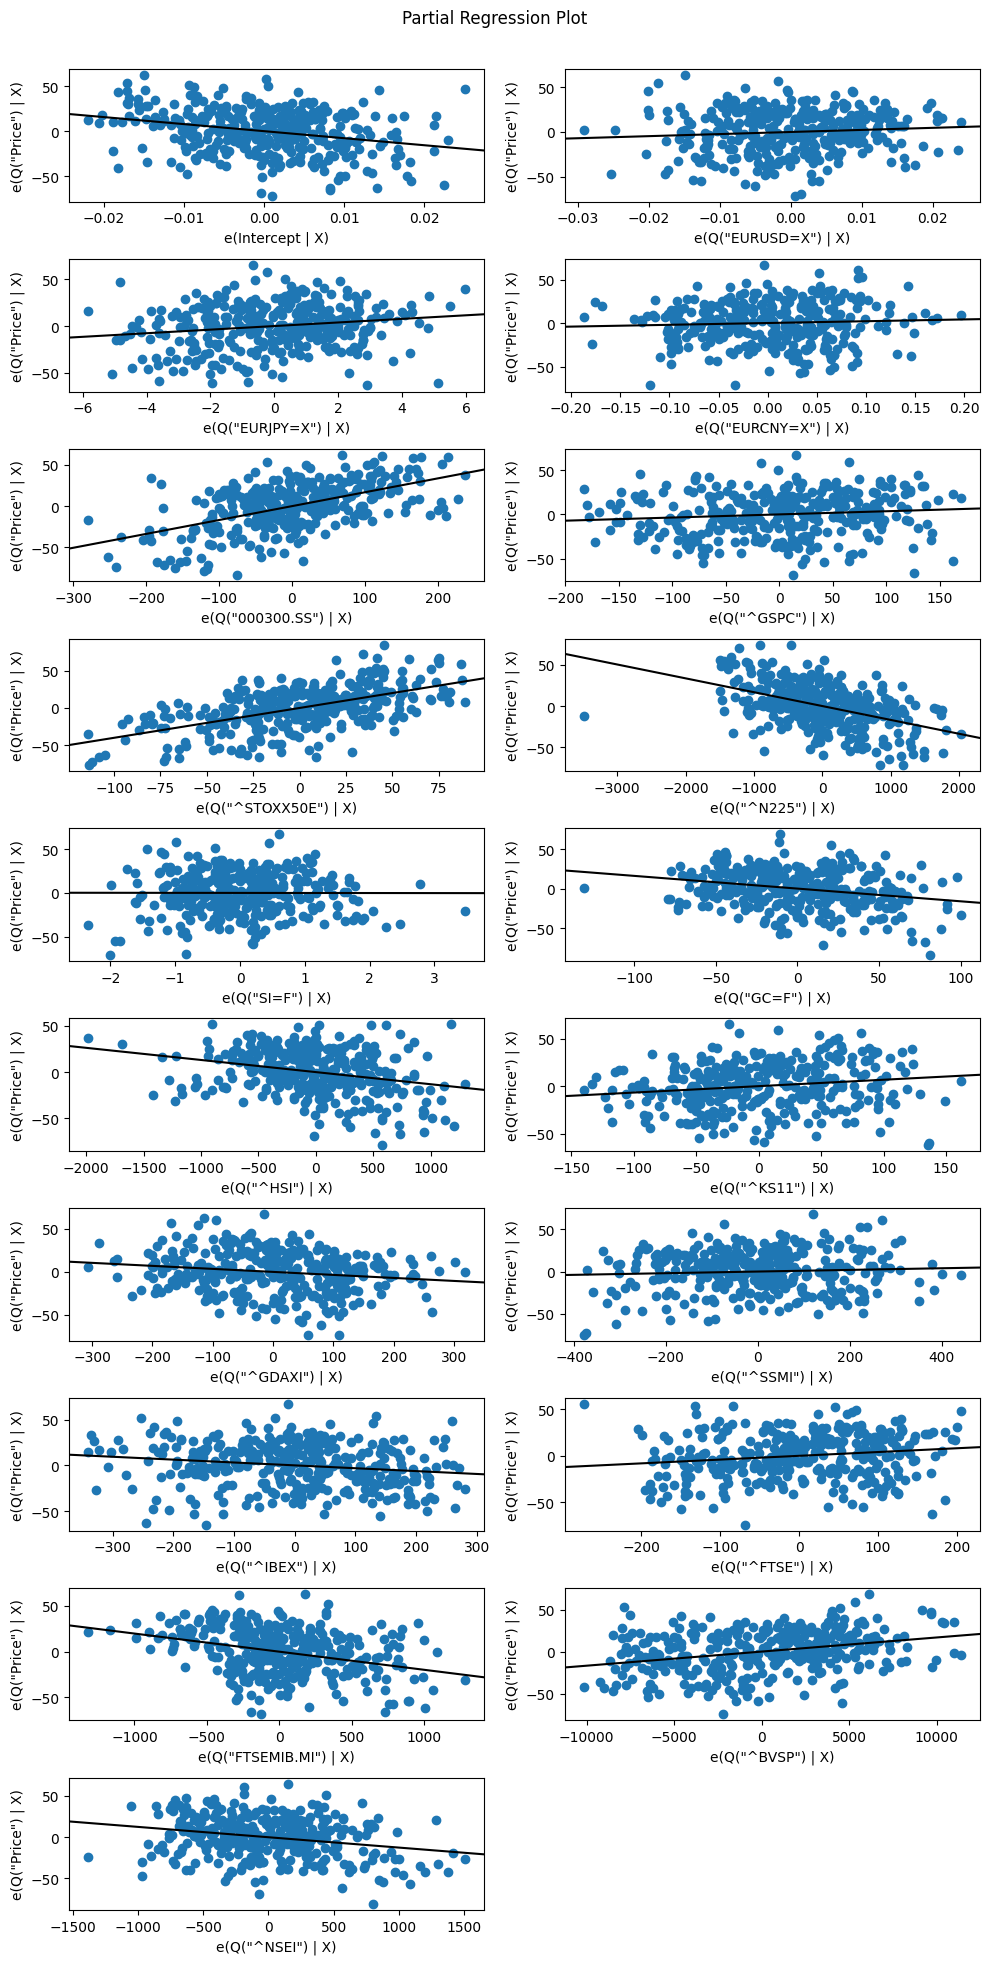

In [ ]:
fig = plt.figure(figsize=(10,20))
sm.graphics.plot_partregress_grid(linear_fit, fig=fig)
plt.show()

In [ ]:
#We have seen on last linear_fit that some datas had too high p_values, so we decide to withdraw so we have a more accurate model
formula = 'Price ~ Q("000300.SS") + Q("^STOXX50E") + Q("^N225") + Q("GC=F") + Q("^HSI") + Q("^KS11") + Q("^NSEI") + Q("FTSEMIB.MI")'

**Kering Linear Regression Results**

In [ ]:
linear_fit = smf.ols(formula=formula, data=df_train).fit()
linear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     982.1
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          7.35e-229
Time:                        23:11:56   Log-Likelihood:                -1646.9
No. Observations:                 347   AIC:                             3312.
Df Residuals:                     338   BIC:                             3346.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         164.1129     39.970      4.106      0.000      85.491     242.735
Q("000300.SS")      0.1285      0.012     10.586      0.000       0.105       0.152
Q("^STOXX50E")      0.3154      0.021     14.842      0.000       0.274       0.357
Q("^N225")         -0.0162      0.001    -15.376      0.000      -0.018      -0.014
Q("GC=F")          -0.1858      0.018    -10.588      0.000      -0.220      -0.151
Q("^HSI")          -0.0129      0.002     -6.910      0.000      -0.017      -0.009
Q("^KS11")          0.1295      0.013      9.720      0.000       0.103       0.156
Q("^NSEI")         -0.0090      0.002     -4.450      0.000      -0.013      -0.005
Q("FTSEMIB.MI")    -0.0203      0.003     -6.743      0.000      -0.026      -0.014
==============================================================================
Omnibus:                        4.295   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.383
Skew:                          -0.259   Prob(JB):                        0.112
Kurtosis:                       2.813   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

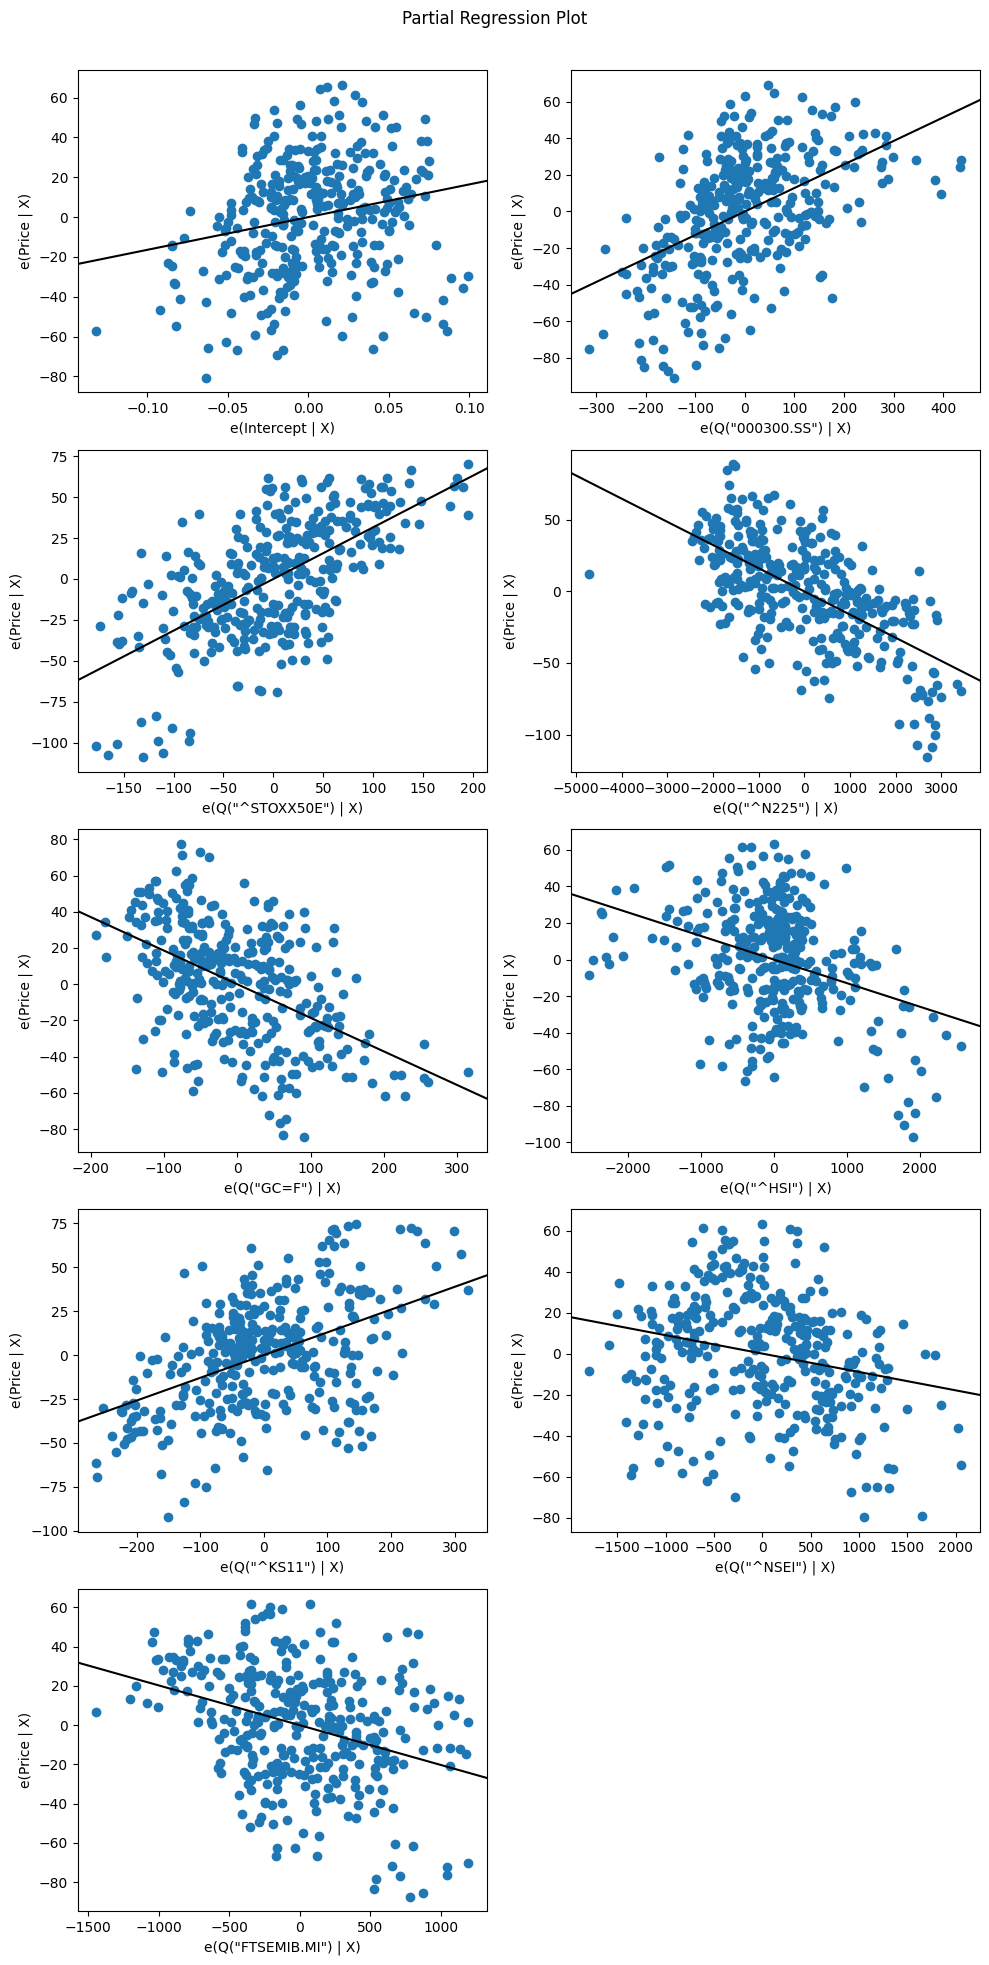

In [ ]:
fig = plt.figure(figsize=(10,20))
sm.graphics.plot_partregress_grid(linear_fit, fig=fig)
plt.show()

Evaluate our model's fit

In [ ]:
train_prediction = linear_fit.predict(df_train)
test_prediction = linear_fit.predict(df_test)

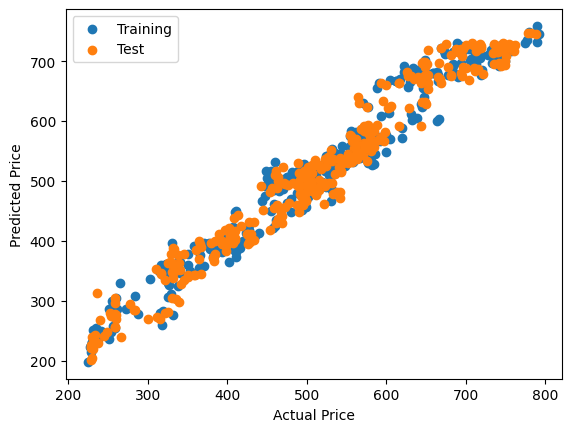

In [ ]:
plt.scatter(df_train['Price'], train_prediction, label='Training')
plt.scatter(df_test['Price'], test_prediction, label='Test')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [ ]:
print('Training Correlation: ' + str(train_prediction.corr(df_train['Price'])))
print('Test Correlation:     ' + str(test_prediction.corr(df_test['Price'])))

Training Correlation: 0.9791597067181891
Test Correlation:     0.9811244389815137


In [ ]:
train_error = df_train['Price'] - train_prediction
train_rmse = np.sqrt(np.mean(np.square(train_error)))
print('Training RMSE: ' + str(train_rmse))

Training RMSE: 27.860141615280238


In [ ]:
test_error = df_test['Price'] - test_prediction
test_rmse = np.sqrt(np.mean(np.square(test_error)))
print('Test RMSE: ' + str(test_rmse))

Test RMSE: 27.275074982613138


Validation of hypothesis :

Kering main markets are located in Europe, North America and East Asia

*True our linear regression shows a real correlation between indexes from the main countries descripted above*

Kering has suffered from the recent depreciation of JPY, because of the loss in purchasing power of Japanese ==> We will try to verify that with the relation with EURJPY

*False : P_value very high meaning Kering stock price don't look to have a relation with the depreciation of JPY*

Kering is very correlated with the Japan market ==> Relation with NKY

*The relation is not obvious, the very low p_value shows that both have a relation, however the negative coefficient doesn't make sense : if the Japanese economy is growing, Kering stock price decreases.
We need to look at more variables to properly understand the relation*

Kering biggest market is China and is dependant from the economic growth of the country ==> Relation with CSI

*True : From the linear regression we can observe a positive coefficient and very low p_value, which confirms our assumptions that China is one of Kering biggest market*

Kering has suffered from a large increase in the price of commodities, that could have lower their margins ==> Relations with silver and gold

True for gold : The relation shows that with the increase in gold price, Kering stock price decreases
Gold is also known as a safe investment vs the inflation, we could therefore have a negative relation between Kering and inflation ==> We will see that later


**Hermes Linear Regression**

In [ ]:
#We reindex all datasets on Kering dataset index
df3.set_index('Date', inplace=True)

#To have all the datas indexed on the same dates, we put the time zone at 0
df3.index = df3.index.tz_localize(None)
eur_usd_aligned = eur_usd.reindex(df3.index)
eur_jpy_aligned = eur_jpy.reindex(df3.index)
eur_cny_aligned = eur_cny.reindex(df3.index)

csi_300_aligned = csi_300.reindex(df3.index)
sp500_aligned = sp500.reindex(df3.index)
eurostoxx_50_aligned = eurostoxx_50.reindex(df3.index)
nikkei_aligned = nikkei.reindex(df3.index)

silver_price_aligned = silver_price.reindex(df3.index)
gold_price_aligned = gold_price.reindex(df3.index)

In [ ]:
#We merge all variables in the same dataset
df_merged = pd.merge(df3[['Price']], eur_usd, left_index=True, right_index=True, how='inner')
df_merged = pd.merge(df_merged, eur_jpy, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, eur_cny, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, csi_300, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, sp500, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, eurostoxx_50, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, nikkei, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, silver_price, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, gold_price, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, hsi, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, kospi, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, dax, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, smi, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, ibex, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, ftse_100, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, ftse_mib, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, ibovespa, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, nifty_50, left_index=True, right_index=True, how='outer')

print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1307 entries, 2019-11-01 to 2024-11-04
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1285 non-null   float64
 1   EURUSD=X    1285 non-null   float64
 2   EURJPY=X    1307 non-null   float64
 3   EURCNY=X    1306 non-null   float64
 4   000300.SS   885 non-null    float64
 5   ^GSPC       1260 non-null   float64
 6   ^STOXX50E   1263 non-null   float64
 7   ^N225       1223 non-null   float64
 8   SI=F        1260 non-null   float64
 9   GC=F        1260 non-null   float64
 10  ^HSI        1232 non-null   float64
 11  ^KS11       1231 non-null   float64
 12  ^GDAXI      1277 non-null   float64
 13  ^SSMI       1251 non-null   float64
 14  ^IBEX       1283 non-null   float64
 15  ^FTSE       1263 non-null   float64
 16  FTSEMIB.MI  1276 non-null   float64
 17  ^BVSP       1246 non-null   float64
 18  ^NSEI       1240 non-null   float64
dtypes: float6

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_merged, test_size=0.5, shuffle=True, random_state=7)

print('Training Data:')
display(df_train.head())
print('')
print('Test Data:')
display(df_test.head())

Training Data:


Price  EURUSD=X    EURJPY=X  EURCNY=X    000300.SS        ^GSPC  \
Date                                                                           
2022-09-12  1317.5  1.007141  143.604996    6.9440          NaN  4110.410156   
2022-11-24  1487.0  1.041623  145.065994    7.4348  3756.810059          NaN   
2020-07-22   749.0  1.153403  123.212997    8.0397          NaN  3276.020020   
2023-10-30  1752.4  1.056245  158.145996    7.5120  3583.770020  4166.819824   
2020-10-19   794.0  1.171550  123.507004    7.8359          NaN  3426.919922   

              ^STOXX50E         ^N225       SI=F         GC=F          ^HSI  \
Date                                                                          
2022-09-12  3646.510010  28542.109375  19.754999  1728.099976           NaN   
2022-11-24  3961.989990  28383.089844        NaN          NaN  17660.900391   
2020-07-22  3370.760010  22751.609375  23.083000  1864.099976  25057.939453   
2023-10-30  4028.320068  30696.960938  23.282000  1996.199951  17406.359375   
2020-10-19  3242.510010  23671.130859  24.657000  1906.400024  24542.259766   

                  ^KS11        ^GDAXI         ^SSMI        ^IBEX        ^FTSE  \
Date                                                                            
2022-09-12          NaN  13402.269531  10990.750000  8194.299805  7473.000000   
2022-11-24  2441.330078  14539.559570  11157.559570  8388.099609  7466.600098   
2020-07-22  2228.659912  13104.250000  10439.040039  7390.100098  6207.100098   
2023-10-30  2310.550049  14716.540039  10382.190430  9013.900391  7327.399902   
2020-10-19  2346.739990  12854.660156  10184.360352  6860.200195  5884.700195   

            FTSEMIB.MI     ^BVSP         ^NSEI  
Date                                            
2022-09-12     22610.0  113407.0  17936.349609  
2022-11-24     24731.0  111831.0  18484.099609  
2020-07-22     20599.0  104290.0  11132.599609  
2023-10-30     27340.0  112532.0  19140.900391  
2020-10-19     19374.0   98658.0  11873.049805


Test Data:


Price  EURUSD=X    EURJPY=X  EURCNY=X    000300.SS        ^GSPC  \
Date                                                                           
2024-07-26  2075.0  1.085128  166.761002  7.845524  3409.290039  5459.100098   
2022-02-16  1241.5  1.135680  131.322998  7.183800  4617.990234  4475.009766   
2022-10-12  1284.0  0.970017  141.490997  6.948400  3784.310059  3577.030029   
2021-03-24   938.4  1.184021  128.481003  7.710000  4928.689941  3889.139893   
2023-09-22  1793.0  1.066155  157.397003  7.659000  3738.929932  4320.060059   

              ^STOXX50E         ^N225       SI=F         GC=F          ^HSI  \
Date                                                                          
2024-07-26  4862.500000  37667.410156  27.860001  2380.000000  17021.310547   
2022-02-16  4137.220215  27460.400391  23.601000  1870.199951  24718.900391   
2022-10-12  3331.530029  26396.830078  18.878000  1670.300049  16701.029297   
2021-03-24  3832.550049  28405.519531  25.201000  1732.900024  27918.140625   
2023-09-22  4207.160156  32402.410156  23.596001  1925.400024  18057.449219   

                  ^KS11        ^GDAXI         ^SSMI         ^IBEX  \
Date                                                                
2024-07-26  2731.899902  18417.550781  12241.490234  11165.900391   
2022-02-16  2729.679932  15396.070312  12191.570312   8737.200195   
2022-10-12  2202.469971  12172.259766  10199.320312   7261.100098   
2021-03-24  2996.350098  14610.389648  11063.870117   8443.700195   
2023-09-22  2508.129883  15557.290039  11014.759766   9502.000000   

                  ^FTSE  FTSEMIB.MI     ^BVSP         ^NSEI  
Date                                                         
2024-07-26  8285.700195     33812.0  127492.0  24834.849609  
2022-02-16  7603.799805     26969.0  115181.0  17322.199219  
2022-10-12  6826.200195     20467.0       NaN  17123.599609  
2021-03-24  6712.899902     24209.0  112064.0  14549.400391  
2023-09-22  7683.899902     28576.0  116009.0  19674.250000

**Hermes Linear Regression Results**

In [ ]:
#We  do the same process of only keeping variables with p_values < 0.05
formula = 'Price ~ Q("000300.SS") + Q("^STOXX50E") + Q("^N225") + Q("GC=F") + Q("^HSI") + Q("^KS11") + Q("^NSEI") + Q("FTSEMIB.MI")'
#We compute the linear fit
linear_fit = smf.ols(formula=formula, data=df_train).fit()
linear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     803.0
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          1.20e-215
Time:                        23:11:59   Log-Likelihood:                -2058.4
No. Observations:                 349   AIC:                             4135.
Df Residuals:                     340   BIC:                             4170.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -543.9845    125.767     -4.325      0.000    -791.363    -296.606
Q("000300.SS")      0.1778      0.037      4.858      0.000       0.106       0.250
Q("^STOXX50E")      1.2814      0.065     19.649      0.000       1.153       1.410
Q("^N225")          0.0096      0.003      2.807      0.005       0.003       0.016
Q("GC=F")          -0.0345      0.053     -0.656      0.512      -0.138       0.069
Q("^HSI")          -0.0581      0.006     -9.944      0.000      -0.070      -0.047
Q("^KS11")         -0.4289      0.043     -9.946      0.000      -0.514      -0.344
Q("^NSEI")         -0.0336      0.006     -5.284      0.000      -0.046      -0.021
Q("FTSEMIB.MI")    -0.0446      0.009     -4.879      0.000      -0.063      -0.027
==============================================================================
Omnibus:                        4.967   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.335
Skew:                          -0.049   Prob(JB):                        0.189
Kurtosis:                       2.531   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

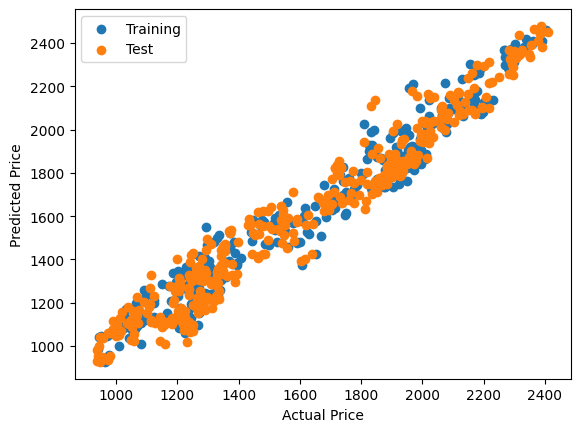

In [ ]:
train_prediction = linear_fit.predict(df_train)
test_prediction = linear_fit.predict(df_test)

plt.scatter(df_train['Price'], train_prediction, label='Training')
plt.scatter(df_test['Price'], test_prediction, label='Test')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [ ]:
print('Training Correlation: ' + str(train_prediction.corr(df_train['Price'])))
print('Test Correlation:     ' + str(test_prediction.corr(df_test['Price'])))

train_error = df_train['Price'] - train_prediction
train_rmse = np.sqrt(np.mean(np.square(train_error)))
print('Training RMSE: ' + str(train_rmse))

test_error = df_test['Price'] - test_prediction
test_rmse = np.sqrt(np.mean(np.square(test_error)))
print('Test RMSE: ' + str(test_rmse))

Training Correlation: 0.9745432023873598
Test Correlation:     0.9759654342124429
Training RMSE: 88.16110649178486
Test RMSE: 88.98905854015781


**LVMH Linear Regression**

In [ ]:
#We reindex all datasets on Kering dataset index
df1.set_index('Date', inplace=True)

#To have all the datas indexed on the same dates, we put the time zone at 0
df1.index = df1.index.tz_localize(None)
eur_usd_aligned = eur_usd.reindex(df1.index)
eur_jpy_aligned = eur_jpy.reindex(df1.index)
eur_cny_aligned = eur_cny.reindex(df1.index)

csi_300_aligned = csi_300.reindex(df1.index)
sp500_aligned = sp500.reindex(df1.index)
eurostoxx_50_aligned = eurostoxx_50.reindex(df1.index)
nikkei_aligned = nikkei.reindex(df1.index)

silver_price_aligned = silver_price.reindex(df1.index)
gold_price_aligned = gold_price.reindex(df1.index)

In [ ]:
#We merge all variables in the same dataset
df_merged = pd.merge(df1[['Price']], eur_usd, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, eur_jpy, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, eur_cny, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, csi_300, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, sp500, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, eurostoxx_50, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, nikkei, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, silver_price, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, gold_price, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, hsi, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, kospi, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, dax, left_index=True, right_index=True, how='outer')
df_merged = pd.merge(df_merged, smi, left_index=True, right_index=True, how='outer')
df_merged = pd. merge(df_merged, ibex, left_index=True, right_index=True, how='outer')
df_merged = pd. merge(df_merged, ftse_100, left_index=True, right_index=True, how='outer')
df_merged = pd. merge(df_merged, ftse_mib, left_index=True, right_index=True, how='outer')
df_merged = pd. merge(df_merged, ibovespa, left_index=True, right_index=True, how='outer')
df_merged = pd. merge(df_merged, nifty_50, left_index=True, right_index=True, how='outer')

print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308 entries, 2019-11-01 to 2024-11-05
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1286 non-null   float64
 1   EURUSD=X    1307 non-null   float64
 2   EURJPY=X    1307 non-null   float64
 3   EURCNY=X    1306 non-null   float64
 4   000300.SS   885 non-null    float64
 5   ^GSPC       1260 non-null   float64
 6   ^STOXX50E   1263 non-null   float64
 7   ^N225       1223 non-null   float64
 8   SI=F        1260 non-null   float64
 9   GC=F        1260 non-null   float64
 10  ^HSI        1232 non-null   float64
 11  ^KS11       1231 non-null   float64
 12  ^GDAXI      1277 non-null   float64
 13  ^SSMI       1251 non-null   float64
 14  ^IBEX       1283 non-null   float64
 15  ^FTSE       1263 non-null   float64
 16  FTSEMIB.MI  1276 non-null   float64
 17  ^BVSP       1246 non-null   float64
 18  ^NSEI       1240 non-null   float64
dtypes: float6

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_merged, test_size=0.5, shuffle=True, random_state=7)

print('Training Data:')
display(df_train.head())
print('')
print('Test Data:')
display(df_test.head())

Training Data:


Price  EURUSD=X    EURJPY=X  EURCNY=X    000300.SS        ^GSPC  \
Date                                                                          
2022-09-12  658.9  1.007141  143.604996    6.9440          NaN  4110.410156   
2022-11-25  700.2  1.040810  144.248993    7.4345  3775.780029  4026.120117   
2020-07-22  404.0  1.153403  123.212997    8.0397          NaN  3276.020020   
2023-10-31  674.5  1.061504  158.261993    7.6060  3572.510010  4193.799805   
2020-10-19  432.9  1.171550  123.507004    7.8359          NaN  3426.919922   

              ^STOXX50E         ^N225       SI=F         GC=F          ^HSI  \
Date                                                                          
2022-09-12  3646.510010  28542.109375  19.754999  1728.099976           NaN   
2022-11-25  3962.409912  28283.029297  21.424999  1753.300049  17573.580078   
2020-07-22  3370.760010  22751.609375  23.083000  1864.099976  25057.939453   
2023-10-31  4061.120117  30858.849609  22.841000  1985.199951  17112.480469   
2020-10-19  3242.510010  23671.130859  24.657000  1906.400024  24542.259766   

                  ^KS11        ^GDAXI         ^SSMI        ^IBEX        ^FTSE  \
Date                                                                            
2022-09-12          NaN  13402.269531  10990.750000  8194.299805  7473.000000   
2022-11-25  2437.860107  14541.379883  11168.030273  8416.599609  7486.700195   
2020-07-22  2228.659912  13104.250000  10439.040039  7390.100098  6207.100098   
2023-10-31  2277.989990  14810.339844  10391.160156  9017.299805  7321.700195   
2020-10-19  2346.739990  12854.660156  10184.360352  6860.200195  5884.700195   

            FTSEMIB.MI     ^BVSP         ^NSEI  
Date                                            
2022-09-12     22610.0  113407.0  17936.349609  
2022-11-25     24719.0  108977.0  18512.750000  
2020-07-22     20599.0  104290.0  11132.599609  
2023-10-31     27742.0  113144.0  19079.599609  
2020-10-19     19374.0   98658.0  11873.049805


Test Data:


Price  EURUSD=X    EURJPY=X  EURCNY=X    000300.SS        ^GSPC  \
Date                                                                          
2024-07-29  654.7  1.085376  167.289001  7.868783  3390.739990  5463.540039   
2022-02-16  687.6  1.135680  131.322998  7.183800  4617.990234  4475.009766   
2022-10-12  621.9  0.970017  141.490997  6.948400  3784.310059  3577.030029   
2021-03-24  553.4  1.184021  128.481003  7.710000  4928.689941  3889.139893   
2023-09-25  713.3  1.064849  158.044006  7.636700  3714.600098  4337.439941   

              ^STOXX50E         ^N225       SI=F         GC=F          ^HSI  \
Date                                                                          
2024-07-29  4815.390137  38468.628906  27.702999  2377.300049  17238.339844   
2022-02-16  4137.220215  27460.400391  23.601000  1870.199951  24718.900391   
2022-10-12  3331.530029  26396.830078  18.878000  1670.300049  16701.029297   
2021-03-24  3832.550049  28405.519531  25.201000  1732.900024  27918.140625   
2023-09-25  4167.370117  32678.619141  23.145000  1916.599976  17729.289062   

                  ^KS11        ^GDAXI         ^SSMI         ^IBEX  \
Date                                                                
2024-07-29  2765.530029  18320.669922  12214.900391  11117.799805   
2022-02-16  2729.679932  15396.070312  12191.570312   8737.200195   
2022-10-12  2202.469971  12172.259766  10199.320312   7261.100098   
2021-03-24  2996.350098  14610.389648  11063.870117   8443.700195   
2023-09-25  2495.760010  15405.490234  11014.259766   9386.000000   

                  ^FTSE  FTSEMIB.MI     ^BVSP         ^NSEI  
Date                                                         
2024-07-29  8292.400391     33641.0  126954.0  24836.099609  
2022-02-16  7603.799805     26969.0  115181.0  17322.199219  
2022-10-12  6826.200195     20467.0       NaN  17123.599609  
2021-03-24  6712.899902     24209.0  112064.0  14549.400391  
2023-09-25  7624.000000     28382.0  115925.0  19674.550781

**LVMH Linear Regression Results**

In [ ]:
#We have seen on last linear_fit that some datas had too high p_values, so we decide to withdraw so we have a more accurate model
formula = 'Price ~ Q("000300.SS") + Q("^STOXX50E") + Q("^N225") + Q("GC=F") + Q("^HSI") + Q("^KS11") + Q("^NSEI") + Q("FTSEMIB.MI")'
#We compute the linear fit
linear_fit = smf.ols(formula=formula, data=df_train).fit()
linear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     184.4
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          2.02e-117
Time:                        23:11:59   Log-Likelihood:                -1710.8
No. Observations:                 342   AIC:                             3440.
Df Residuals:                     333   BIC:                             3474.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         484.2859     51.512      9.401      0.000     382.956     585.616
Q("000300.SS")      0.0340      0.015      2.271      0.024       0.005       0.063
Q("^STOXX50E")      0.6337      0.028     22.836      0.000       0.579       0.688
Q("^N225")         -0.0017      0.001     -1.217      0.225      -0.004       0.001
Q("GC=F")          -0.1334      0.022     -6.050      0.000      -0.177      -0.090
Q("^HSI")          -0.0137      0.002     -5.564      0.000      -0.019      -0.009
Q("^KS11")         -0.1784      0.018     -9.966      0.000      -0.214      -0.143
Q("^NSEI")         -0.0287      0.003    -10.907      0.000      -0.034      -0.024
Q("FTSEMIB.MI")    -0.0358      0.004     -9.344      0.000      -0.043      -0.028
==============================================================================
Omnibus:                       12.001   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.920
Skew:                           0.298   Prob(JB):                     0.000349
Kurtosis:                       3.872   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

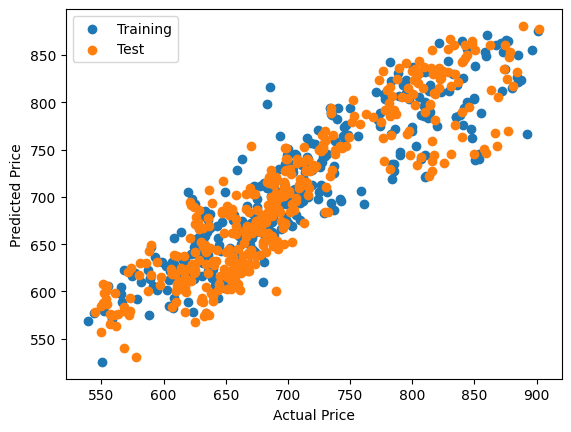

In [ ]:
train_prediction = linear_fit.predict(df_train)
test_prediction = linear_fit.predict(df_test)

plt.scatter(df_train['Price'], train_prediction, label='Training')
plt.scatter(df_test['Price'], test_prediction, label='Test')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [ ]:
print('Training Correlation: ' + str(train_prediction.corr(df_train['Price'])))
print('Test Correlation:     ' + str(test_prediction.corr(df_test['Price'])))

train_error = df_train['Price'] - train_prediction
train_rmse = np.sqrt(np.mean(np.square(train_error)))
print('Training RMSE: ' + str(train_rmse))

test_error = df_test['Price'] - test_prediction
test_rmse = np.sqrt(np.mean(np.square(test_error)))
print('Test RMSE: ' + str(test_rmse))

Training Correlation: 0.9032201930870645
Test Correlation:     0.9098064334460926
Training RMSE: 35.994005538418314
Test RMSE: 35.401829854711934


Our model shows that there is more correlation with Hermes which is good because Hermes performs very well during this luxury "crisis". Therefore, we could take some examples on Hermes strategy to see what could be better done for Kering.  By observing both linear regression we can see a lot of similarities. However Hermes seems to be more dependant on european market and have a smaller concentration in Asia

However this model seems to explain correlation but we don't know about the causation. To know more we will take a closer approach to results from each company

We decided to gather dataset with the variation of revenue from a quarter to the quarter of the precedent year compared to macoreconomic variables.
To have a more accurate analysis we decided to withdraw the datas from Q2 of both 2020 and 2021 because of the covid crisis which could mislead our model


**Decision Trees**

In [ ]:
#We start by converting all our percentages datas in number values
def convert_percentage_to_float(col):
    return pd.to_numeric(col.str.replace('%', '').str.replace(',', '.'), errors='coerce') / 100
df = pd.read_csv('/content/drive/MyDrive/DataFinalProject/datasetdecisiontreetest.csv')

percentage_columns = [
    'Kering', 'Gucci', 'YSL', 'Bottega', 'Kering Eyewear', 'Hermes', 'Inflation EU', 'Inflation Chinoise', 'Inflation Japon', 'Inflation US',
    'Retail sales europe', 'Retail sales chine', 'Retail sales japon', 'Retail sales US',
    'Unemployment rate eu', 'Unemployment rate china', 'Unemployment rate japan', 'Unemployment rate US',
    'ECB rate', 'BOJ rate', 'FED rate', 'China GDP', 'Japan GDP', 'US GDP', 'EU GDP', 'China House Prices', 'China Loan Growth'
]

for col in percentage_columns:
    if col in df.columns:
        df[col] = convert_percentage_to_float(df[col])

display(df)

Kering   Gucci     YSL  Bottega  Kering Eyewear  Hermes  Inflation EU  \
0  -0.1519 -0.2598 -0.1276   0.0420          0.3213  0.1007         0.018   
1  -0.1076 -0.2014 -0.0896   0.0228          0.2179  0.1152         0.026   
2  -0.1129 -0.2053 -0.0819  -0.0253          0.2379  0.1257         0.024   
3  -0.0600 -0.0750 -0.0753  -0.0810          0.2407  0.1247         0.029   
4  -0.1310 -0.1410 -0.1616  -0.1281          0.3162  0.0730         0.043   
5   0.0169 -0.0271  0.0377   0.0000          0.5406  0.2240         0.055   
6   0.0244  0.0096  0.0907  -0.0025          0.4058  0.2224         0.069   
7  -0.0233 -0.1098  0.0972   0.0856          0.0000  0.2567         0.092   
8   0.2266  0.1829  0.4028   0.2039          0.0000  0.3249         0.100   
9   0.1965  0.1173  0.4026   0.1557          0.0000  0.5719         0.086   
10  0.2740  0.1957  0.4294   0.2073          0.0000  0.1012         0.058   
11  0.3511  0.3584  0.4909   0.1551          0.0000  0.1328         0.050   
12  0.1264  0.0556  0.2779   0.0901          0.0000  0.1130         0.034   
13  0.2145  0.2012  0.1885   0.1799          0.0000  0.6684         0.013   
14 -0.0817 -0.1426 -0.0299   0.1198          0.0000  0.1229        -0.003   
15 -0.0430 -0.1293  0.0079   0.1725          0.0000 -0.1400        -0.002   
16 -0.1538 -0.2241 -0.1265   0.1210          0.0000 -0.0646         0.007   
17  0.1400  0.1290  0.1660   0.1220          0.0000  0.1600         0.013   
18  0.1390  0.1330  0.1330   0.0980          0.0000  0.1470         0.008   
19  0.1570  0.1540  0.1890   0.0340          0.0000  0.1500         0.013   
20  0.2170  0.2460  0.2190  -0.0500          0.0000  0.1380         0.014   

    Inflation Chinoise  Inflation Japon  Inflation US  ...  US Trade Balance  \
0                0.004            0.025         0.024  ...            -233.6   
1                0.002            0.028         0.030  ...            -222.8   
2                0.001            0.027         0.035  ...            -205.7   
3               -0.003            0.026         0.034  ...            -189.7   
4                0.000            0.030         0.037  ...            -184.8   
5                0.000            0.033         0.030  ...            -209.1   
6                0.007            0.032         0.050  ...            -203.0   
7                0.018            0.040         0.065  ...            -207.1   
8                0.028            0.030         0.082  ...            -211.4   
9                0.025            0.024         0.091  ...            -252.2   
10               0.015            0.012         0.085  ...            -288.7   
11               0.015            0.008         0.070  ...            -228.0   
12               0.007            0.002         0.054  ...            -224.3   
13               0.004           -0.002         0.026  ...            -215.8   
14               0.002           -0.012         0.014  ...            -197.8   
15               0.017            0.000         0.014  ...            -194.6   
16               0.043            0.004         0.015  ...            -154.7   
17               0.045            0.008         0.023  ...             -48.9   
18               0.030            0.002         0.017  ...             -52.5   
19               0.027            0.007         0.016  ...             -55.2   
20               0.023            0.005         0.019  ...             -50.0   

    EU Trade Balance  China GDP  Japan GDP  US GDP  EU GDP  \
0               22.0      0.004      0.002   0.028   0.004   
1               51.2      0.002     -0.005   0.030   0.002   
2               59.1      0.003      0.008   0.014   0.003   
3               48.2      0.000     -0.005   0.016   0.000   
4               23.2     -0.001     -0.005   0.032  -0.001   
5               11.0      0.001      0.001   0.049   0.001   
6               -0.4     -0.001     -0.001   0.049  -0.001   
7              -47.0      0.000     -0.007   0.021  

In [ ]:
print(df.columns)

Index(['Kering', 'Gucci', 'YSL', 'Bottega', 'Kering Eyewear', 'Hermes',
       'Inflation EU', 'Inflation Chinoise', 'Inflation Japon', 'Inflation US',
       'Retail sales europe', 'Retail sales chine', 'Retail sales japon',
       'Retail sales US', 'Consumer confidence europe ',
       'Consumer confidence chine', 'Consumer confidence japon',
       'Consumer confidence US', 'Unemployment rate eu',
       'Unemployment rate china', 'Unemployment rate japan',
       'Unemployment rate US', 'ECB rate', 'BOJ rate', 'FED rate',
       'China Trade Balance', 'Japan Trade Balance', 'US Trade Balance',
       'EU Trade Balance', 'China GDP', 'Japan GDP', 'US GDP', 'EU GDP',
       'China House Prices', 'China Loan Growth', 'China New Loans', 'Gold'],
      dtype='object')


In [ ]:
#We choose our target and our features
target = 'Kering'

features = [
      'Inflation EU', 'Inflation Chinoise', 'Inflation Japon', 'Inflation US',
       'Retail sales europe', 'Retail sales chine', 'Retail sales japon',
       'Retail sales US', 'Consumer confidence europe ',
       'Consumer confidence chine', 'Consumer confidence japon',
       'Consumer confidence US', 'Unemployment rate eu',
       'Unemployment rate china', 'Unemployment rate japan',
       'Unemployment rate US', 'ECB rate', 'BOJ rate', 'FED rate',
       'China Trade Balance', 'Japan Trade Balance', 'US Trade Balance',
       'EU Trade Balance', 'China GDP', 'Japan GDP', 'US GDP', 'EU GDP',
       'China House Prices', 'China Loan Growth', 'China New Loans', 'Gold'
]

In [ ]:
#Generate the tree
dt = sklearn.tree.DecisionTreeRegressor(random_state=7)
dt.fit(df[features], df[target])

DecisionTreeRegressor(random_state=7)

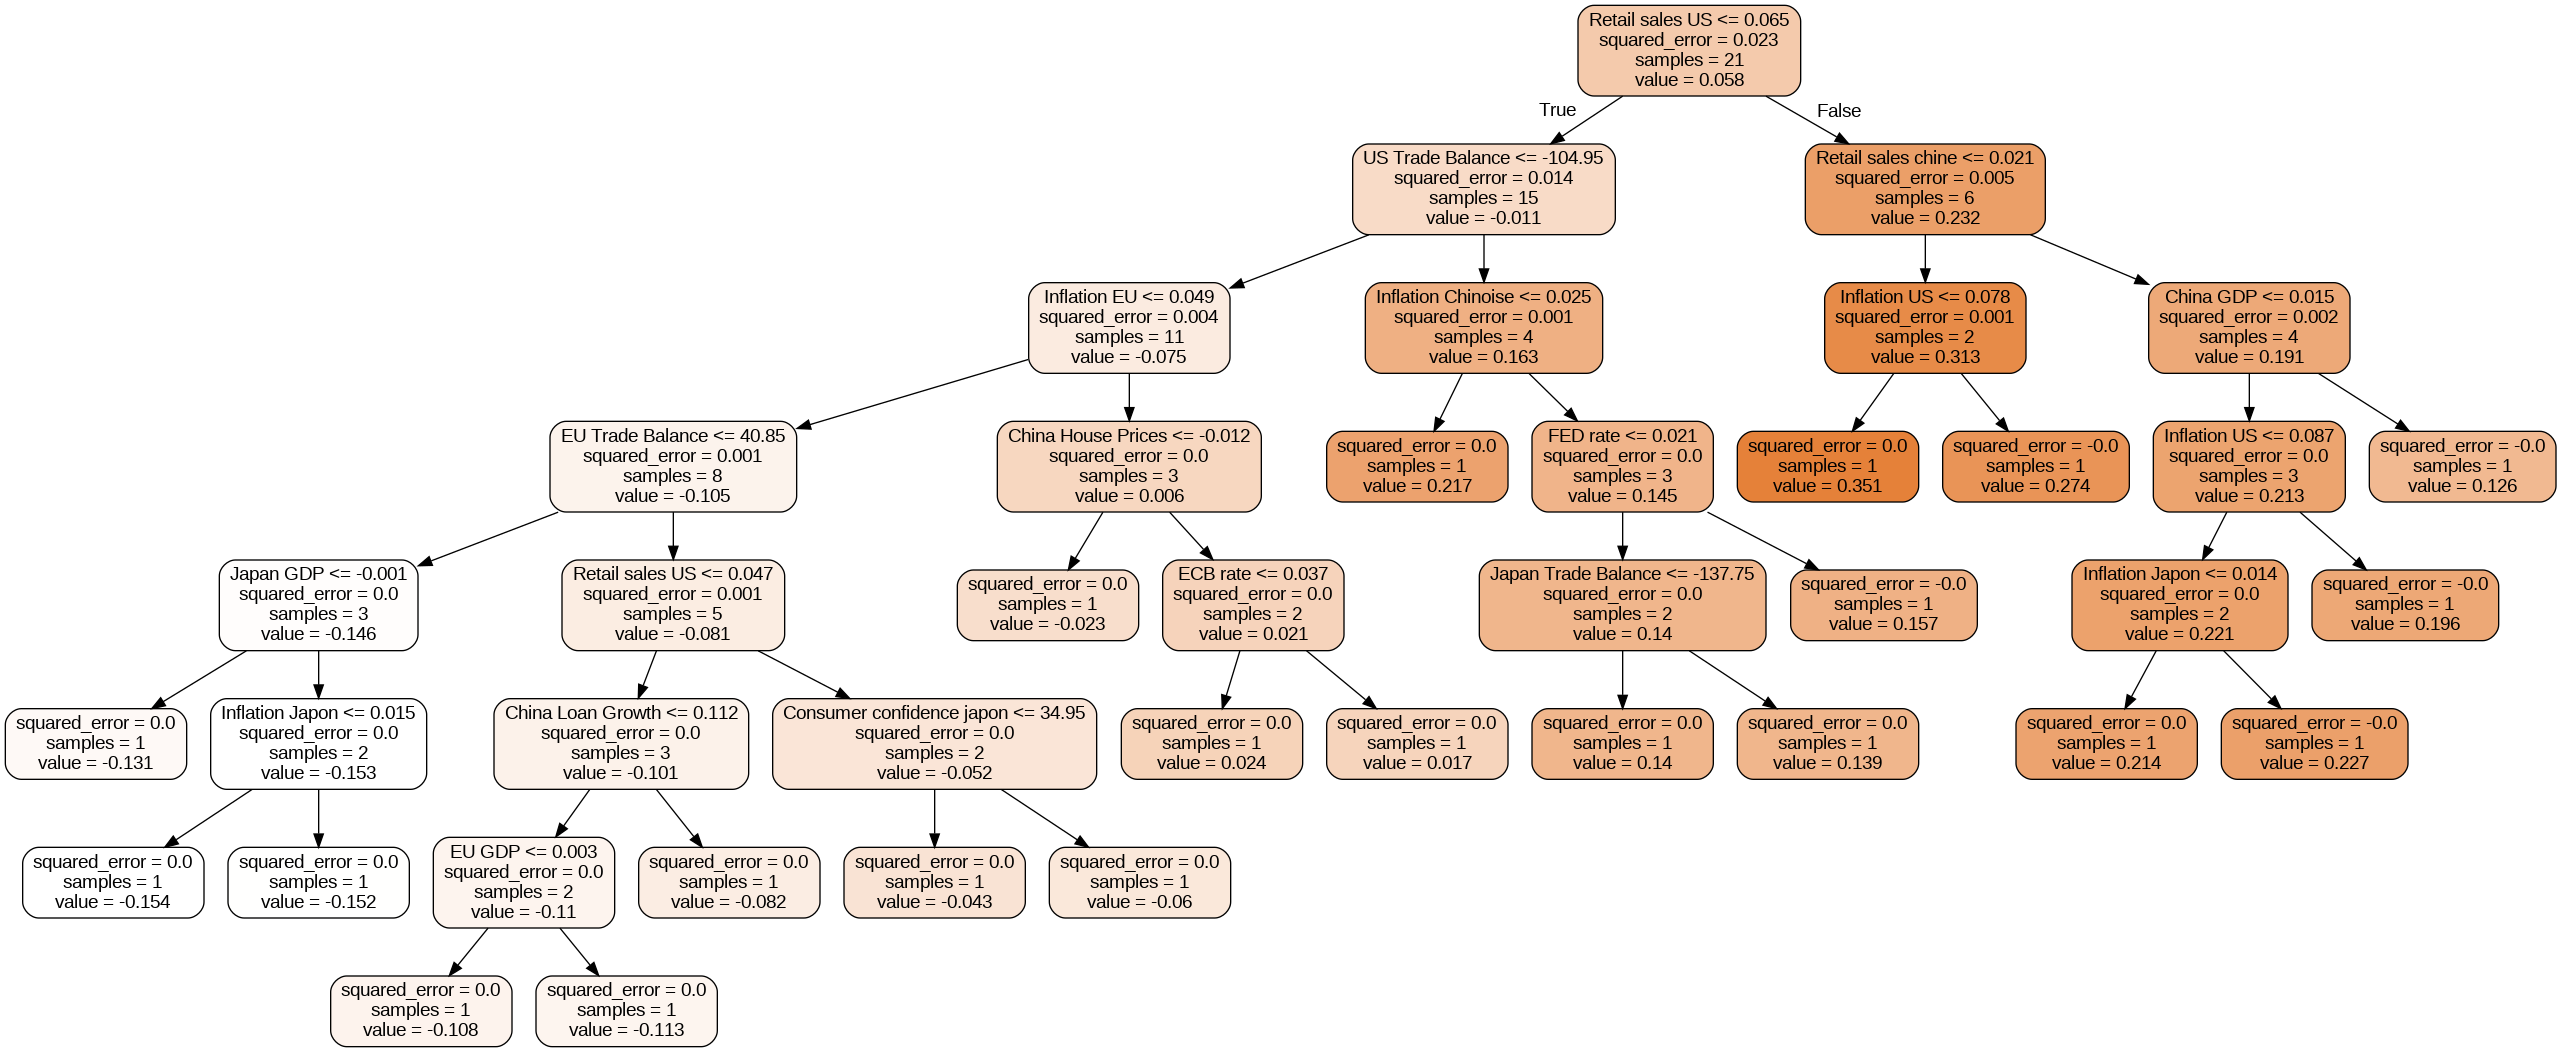

In [ ]:
from sklearn.tree import export_graphviz

def GetDecisionTreeGraphViz(dt, features):
    return graphviz.Source(export_graphviz(
        dt,
        out_file=None,
        filled=True,
        impurity=True,
        feature_names=features,
        rounded=True
    ))

#The zoomed-out visualization
display(Image(GetDecisionTreeGraphViz(dt, features).pipe(format='png'), width=1024))

**Kering Decision Tree**

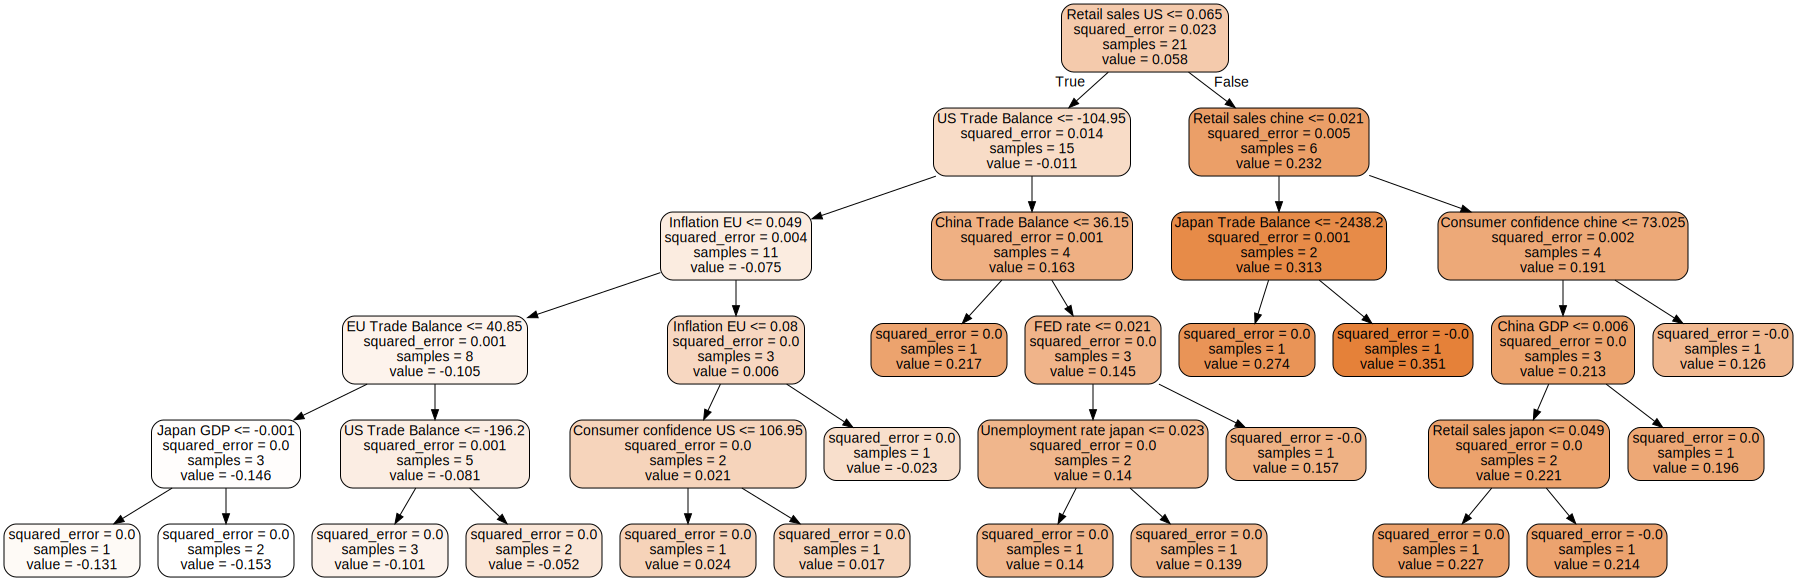

In [ ]:
#We generate a tree and adapt the tree depth with the following test
dt = sklearn.tree.DecisionTreeRegressor(max_depth=5, random_state=7)
dt.fit(df[features], df[target])
display(GetDecisionTreeGraphViz(dt, features))

<Figure size 1200x400 with 0 Axes>

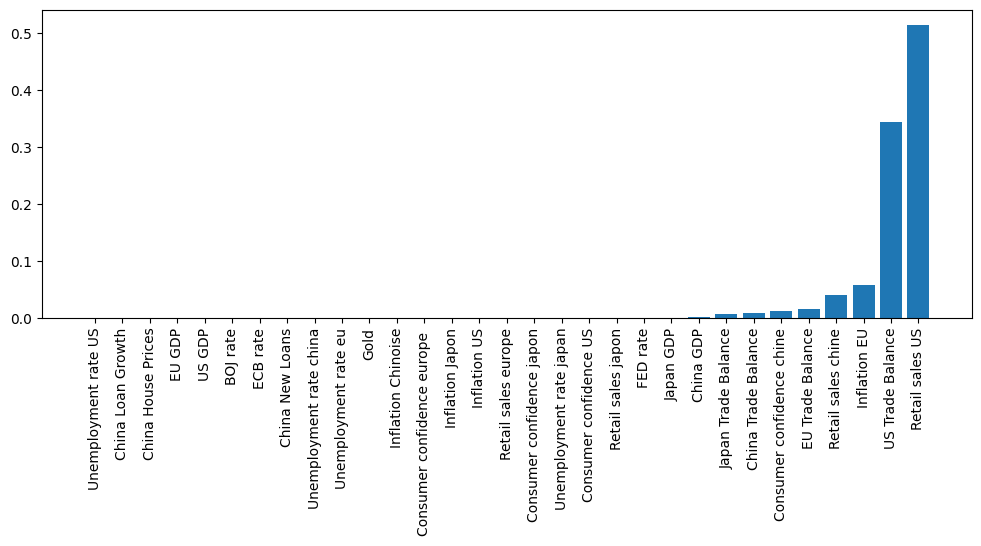

In [ ]:
#We plot the features importance
plt.figure(figsize=[12, 4])
I = np.argsort(dt.feature_importances_)
plt.figure(figsize=[12, 4])
plt.bar([features[i] for i in I], [dt.feature_importances_[i] for i in I])
plt.xticks(rotation=90)
plt.show()

Optimal depth : 5


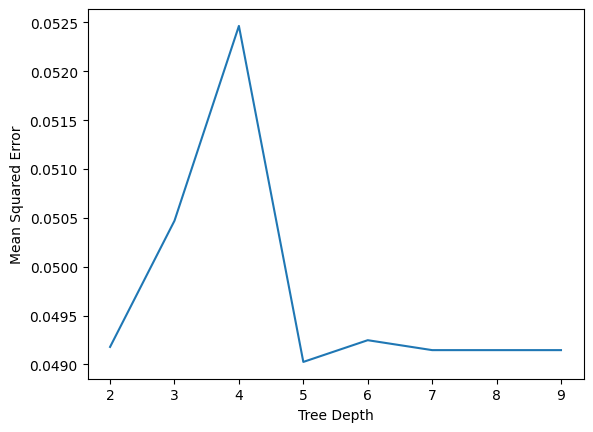

In [ ]:
#We compute the cross validation score to evaluate the best depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

depths = range(2, 10)
mean_mse_scores = []

X = df[features]
y = df[target]

#Test each depth
for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=7)
    mse_scores = -cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse_scores.append(mse_scores.mean())

#Find depth with the lowest error
best_depth = depths[np.argmin(mean_mse_scores)]
print(f"Optimal depth : {best_depth}")

plt.plot(depths, mean_mse_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
#Compute R^2 to evaluate the performance of the model
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=best_depth, random_state=7) # Initialize with best_depth

dt.fit(X, y)

# Now you can make predictions
predictions = dt.predict(X)
print("R^2 score:", r2_score(y, predictions))

R^2 score: 0.9985697470579213


By looking on the right side of this decision tree, we can notice a real link between the good quarterly results of Kering and the good macroeconomic situation in East Asia.
By looking more closely, we can see that the main factor of growth was mainly due to China's situation and that the Japan's only influence a little bit: a great situation in both China and Japan would lead to an amazing growth, however the remaining growth situation are due to good situations in China, the Japan situation on itself isn't enough to satistify Kering's growth.
However when we look on the left side, we can see that the poor recent results are mainly explicated by a lowest level of GDP, importations and retail sales in both US and EU.
We can therefore make the assumption that the situation in EU and US is no sufficient to maintain the level of revenue Kering need to have financial growth


To enhance our analysis, we try to go in more details with main Kering brands which are Gucci, YSL and Bottega

**Gucci Decision Tree**

In [ ]:
#We choose our target and our features
target = 'Gucci'

features = [
      'Inflation EU', 'Inflation Chinoise', 'Inflation Japon', 'Inflation US',
       'Retail sales europe', 'Retail sales chine', 'Retail sales japon',
       'Retail sales US', 'Consumer confidence europe ',
       'Consumer confidence chine', 'Consumer confidence japon',
       'Consumer confidence US', 'Unemployment rate eu',
       'Unemployment rate china', 'Unemployment rate japan',
       'Unemployment rate US', 'ECB rate', 'BOJ rate', 'FED rate',
       'China Trade Balance', 'Japan Trade Balance', 'US Trade Balance',
       'EU Trade Balance', 'China GDP', 'Japan GDP', 'US GDP', 'EU GDP',
       'China House Prices', 'China Loan Growth', 'China New Loans', 'Gold'
]

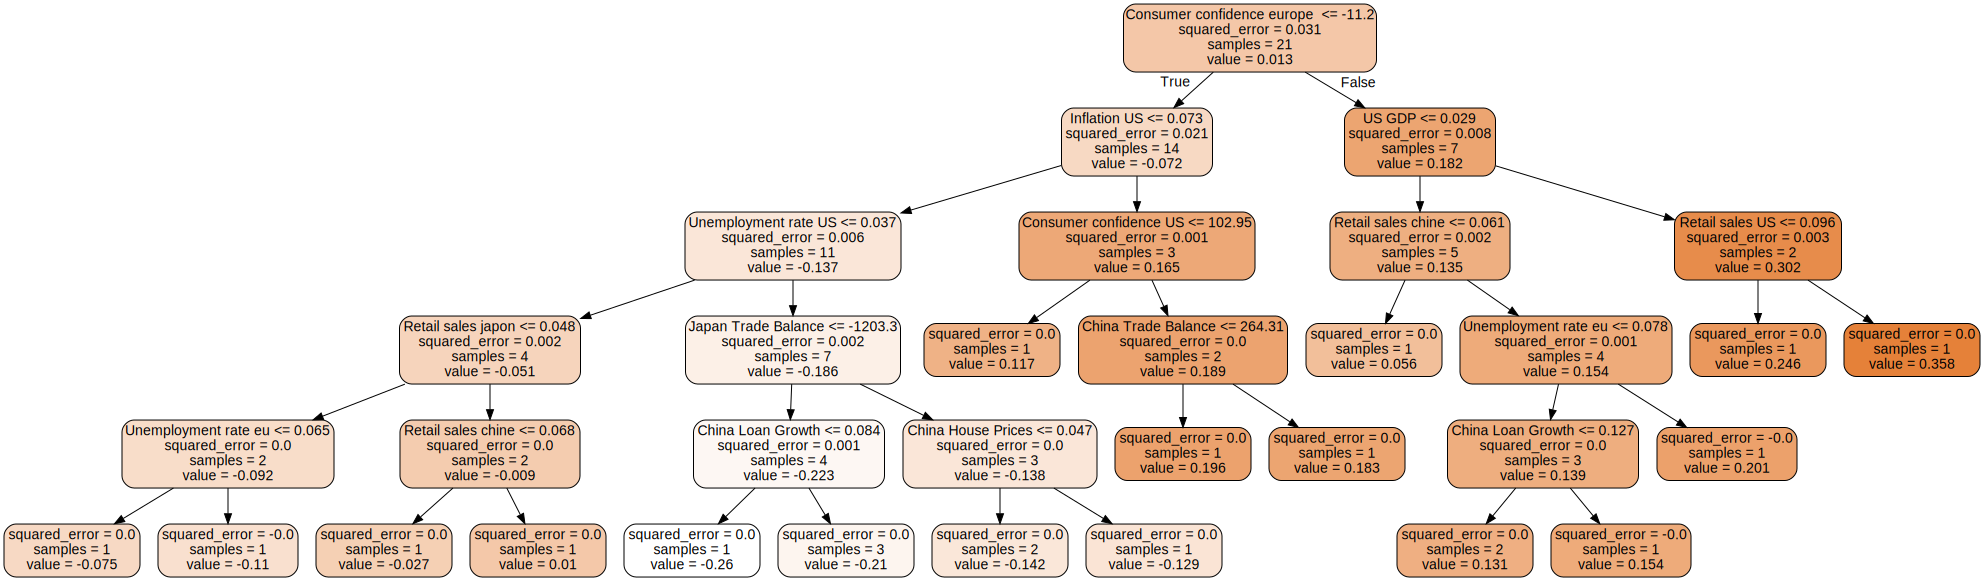

In [ ]:
#We generate a tree and adapt the tree depth with the following test
dt = sklearn.tree.DecisionTreeRegressor(max_depth=5, random_state=7)
dt.fit(df[features], df[target])
display(GetDecisionTreeGraphViz(dt, features))

<Figure size 1200x400 with 0 Axes>

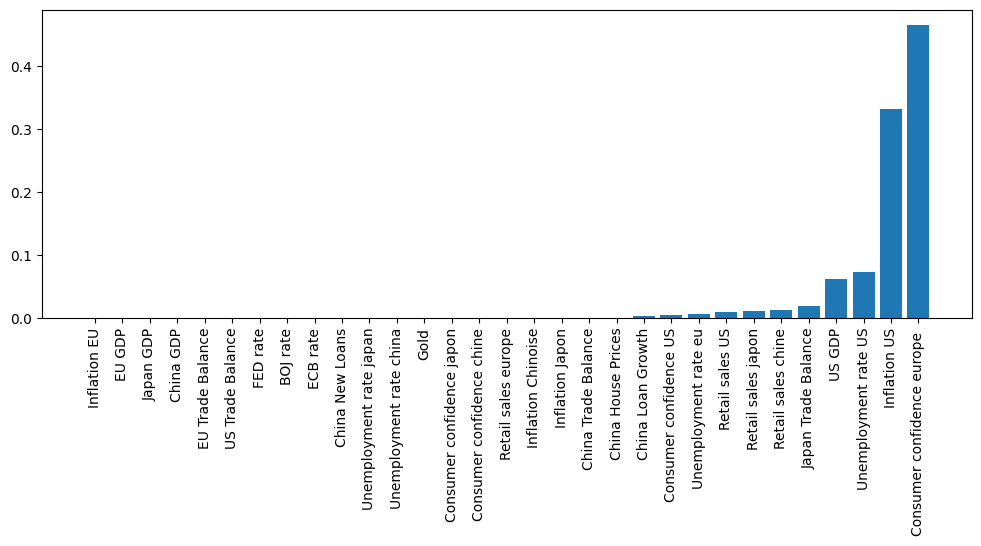

In [ ]:
#We plot the features importance
plt.figure(figsize=[12, 4])
I = np.argsort(dt.feature_importances_)
plt.figure(figsize=[12, 4])
plt.bar([features[i] for i in I], [dt.feature_importances_[i] for i in I])
plt.xticks(rotation=90)
plt.show()

Optimal depth : 5


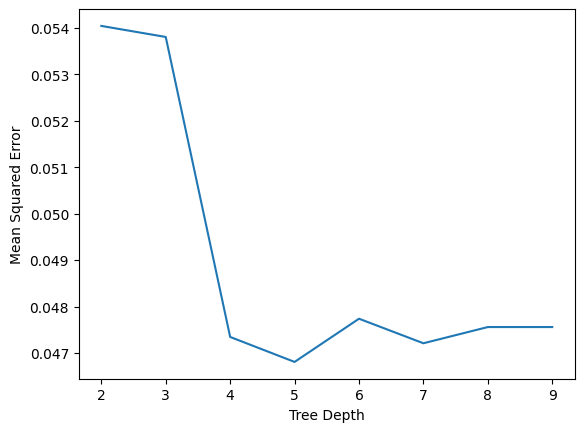

In [ ]:
#We compute the cross validation score to evaluate the best depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

depths = range(2, 10)
mean_mse_scores = []

X = df[features]
y = df[target]

#Test each depth
for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=7)
    mse_scores = -cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse_scores.append(mse_scores.mean())

#Find depth with the lowest error
best_depth = depths[np.argmin(mean_mse_scores)]
print(f"Optimal depth : {best_depth}")

plt.plot(depths, mean_mse_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
#Compute R^2 to evaluate the performance of the model
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=best_depth, random_state=7) # Initialize with best_depth

dt.fit(X, y)

# Now you can make predictions
predictions = dt.predict(X)
print("R^2 score:", r2_score(y, predictions))

R^2 score: 0.999531383762736


We can see that our model for Gucci is very similar to the Kering one: Gucci had wonderful results thanks to situation in East Asia but struggle to maintain it with the global macro economic situation.

Gucci seems to be the main factor of Kering's increase/decrease, we try to analyse the 2 other brands to validate this assumption

**YSL Decision Tree**

In [ ]:
#We choose our target and our features
target = 'YSL'

features = [
      'Inflation EU', 'Inflation Chinoise', 'Inflation Japon', 'Inflation US',
       'Retail sales europe', 'Retail sales chine', 'Retail sales japon',
       'Retail sales US', 'Consumer confidence europe ',
       'Consumer confidence chine', 'Consumer confidence japon',
       'Consumer confidence US', 'Unemployment rate eu',
       'Unemployment rate china', 'Unemployment rate japan',
       'Unemployment rate US', 'ECB rate', 'BOJ rate', 'FED rate',
       'China Trade Balance', 'Japan Trade Balance', 'US Trade Balance',
       'EU Trade Balance', 'China GDP', 'Japan GDP', 'US GDP', 'EU GDP',
       'China House Prices', 'China Loan Growth', 'China New Loans', 'Gold'
]

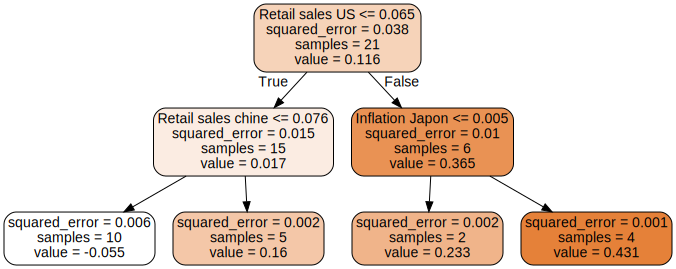

In [ ]:
#We generate a tree and adapt the tree depth with the following test
dt = sklearn.tree.DecisionTreeRegressor(max_depth=2, random_state=7)
dt.fit(df[features], df[target])
display(GetDecisionTreeGraphViz(dt, features))

<Figure size 1200x400 with 0 Axes>

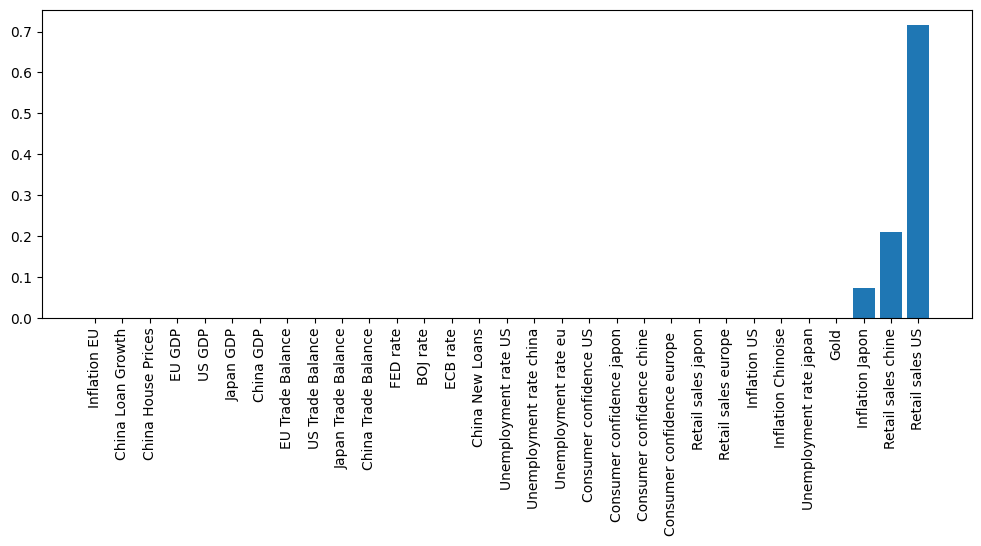

In [ ]:
#We plot the features importance
plt.figure(figsize=[12, 4])
I = np.argsort(dt.feature_importances_)
plt.figure(figsize=[12, 4])
plt.bar([features[i] for i in I], [dt.feature_importances_[i] for i in I])
plt.xticks(rotation=90)
plt.show()

Optimal depth : 2


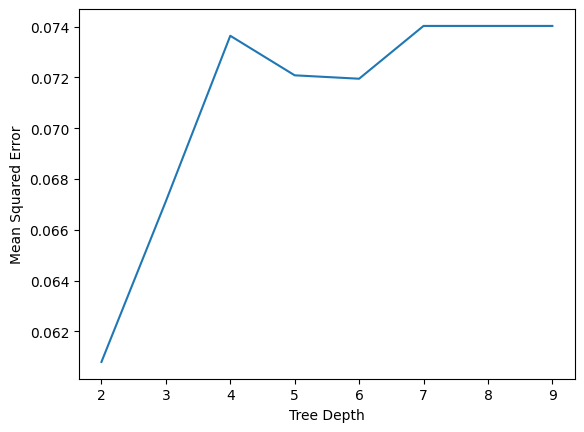

In [ ]:
#We compute the cross validation score to evaluate the best depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

depths = range(2, 10)
mean_mse_scores = []

X = df[features]
y = df[target]

#Test each depth
for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=7)
    mse_scores = -cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse_scores.append(mse_scores.mean())

#Find depth with the lowest error
best_depth = depths[np.argmin(mean_mse_scores)]
print(f"Optimal depth : {best_depth}")

plt.plot(depths, mean_mse_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
#Compute R^2 to evaluate the performance of the model
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=best_depth, random_state=7) # Initialize with best_depth

dt.fit(X, y)

# Now you can make predictions
predictions = dt.predict(X)
print("R^2 score:", r2_score(y, predictions))

R^2 score: 0.9014494238749516


**Bottega Decision Tree**

In [ ]:
#We choose our target and our features
target = 'Bottega'

features = [
      'Inflation EU', 'Inflation Chinoise', 'Inflation Japon', 'Inflation US',
       'Retail sales europe', 'Retail sales chine', 'Retail sales japon',
       'Retail sales US', 'Consumer confidence europe ',
       'Consumer confidence chine', 'Consumer confidence japon',
       'Consumer confidence US', 'Unemployment rate eu',
       'Unemployment rate china', 'Unemployment rate japan',
       'Unemployment rate US', 'ECB rate', 'BOJ rate', 'FED rate',
       'China Trade Balance', 'Japan Trade Balance', 'US Trade Balance',
       'EU Trade Balance', 'China GDP', 'Japan GDP', 'US GDP', 'EU GDP',
       'China House Prices', 'China Loan Growth', 'China New Loans', 'Gold'
]

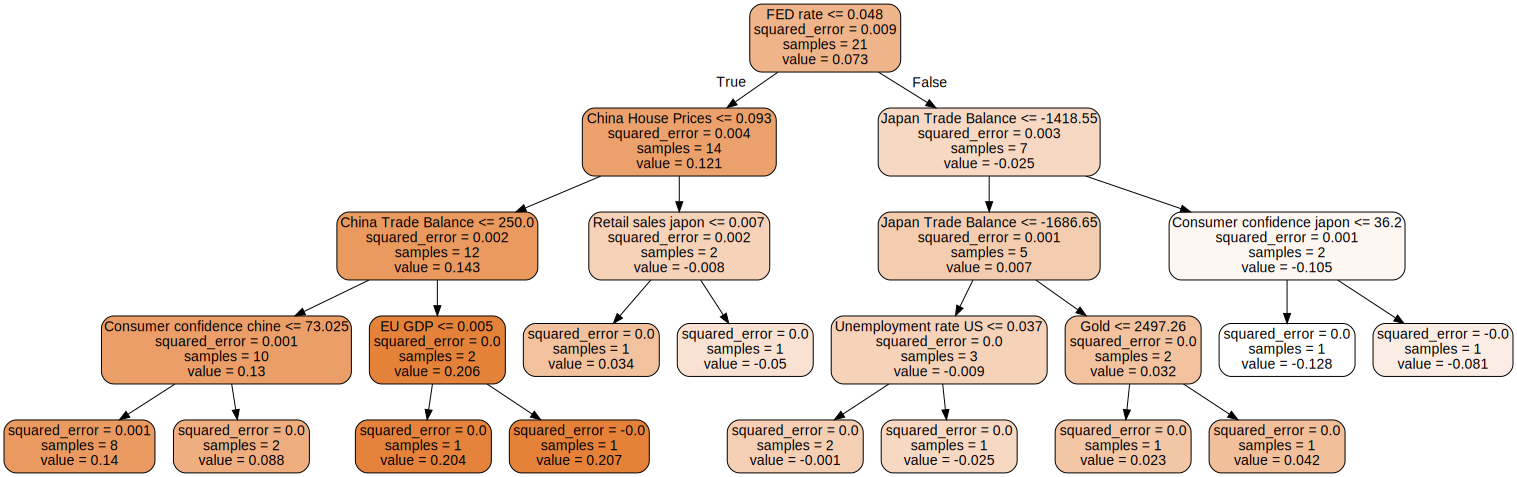

In [ ]:
#We generate a tree and adapt the tree depth with the following test
dt = sklearn.tree.DecisionTreeRegressor(max_depth=4, random_state=7)
dt.fit(df[features], df[target])
display(GetDecisionTreeGraphViz(dt, features))

<Figure size 1200x400 with 0 Axes>

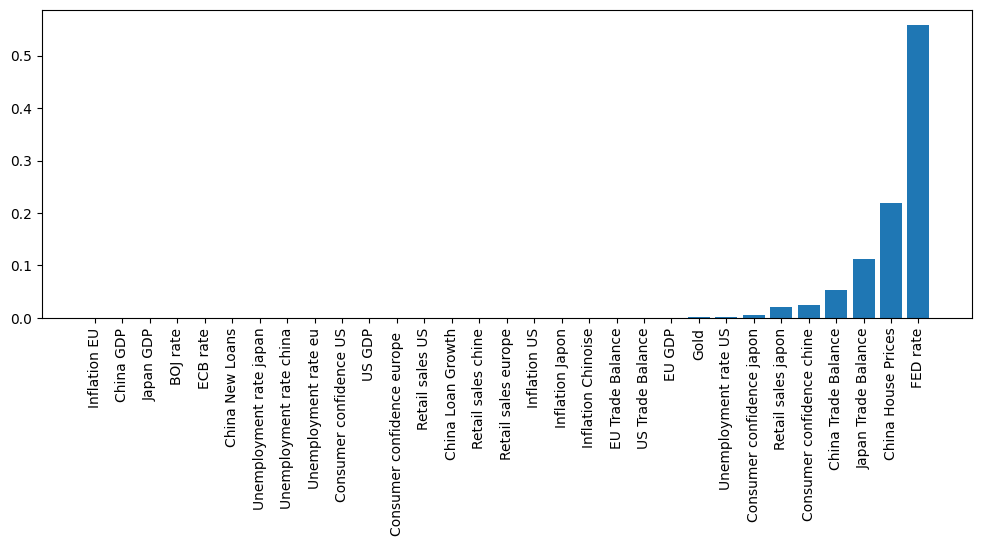

In [ ]:
#We plot the features importance
plt.figure(figsize=[12, 4])
I = np.argsort(dt.feature_importances_)
plt.figure(figsize=[12, 4])
plt.bar([features[i] for i in I], [dt.feature_importances_[i] for i in I])
plt.xticks(rotation=90)
plt.show()

Optimal depth : 4


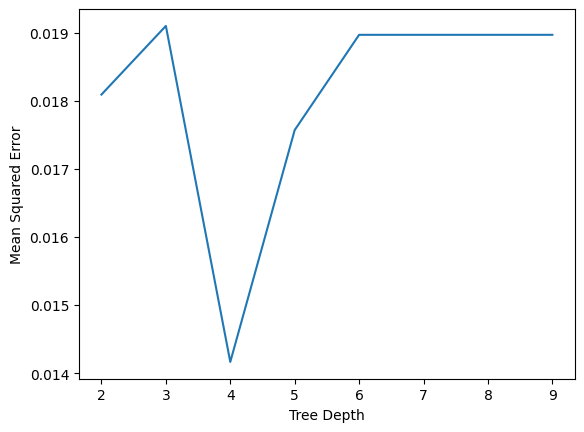

In [ ]:
#We compute the cross validation score to evaluate the best depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

depths = range(2, 10)
mean_mse_scores = []

X = df[features]
y = df[target]

#Test each depth
for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=7)
    mse_scores = -cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse_scores.append(mse_scores.mean())

#Find depth with the lowest error
best_depth = depths[np.argmin(mean_mse_scores)]
print(f"Optimal depth : {best_depth}")

plt.plot(depths, mean_mse_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
#Compute R^2 to evaluate the performance of the model
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=best_depth, random_state=7) # Initialize with best_depth

dt.fit(X, y)

# Now you can make predictions
predictions = dt.predict(X)
print("R^2 score:", r2_score(y, predictions))

R^2 score: 0.9672666198629367



With the analysis we can see an R^2 lower than our previous analysis, meaning that both YSL and Bottega are not influenced by the same trends. This also validate our assumption that Gucci is the main brand of Kering and that the 2 others have less impact on Kering revenue. The 2 brands also suffered from the situation in China, but were able to leverage value in other markets and therefore keep revenue stable with growth or very low decrease compared to Gucci

Next steps try to predict output with different situations: investment in brands, acquisition, relocating the business

**Clustering**

**Store Repartition 2024**

In [ ]:
from sklearn.preprocessing import StandardScaler
# DataFrame creation
data_2024 = {
    "Stores Gucci": [183, 114, 103, 68, 65],
    "Sales Gucci": [508.71, 393.84, 475.89, 147.69, 114.87],
    "Stores Saint Laurent": [117, 68, 71, 34, 31],
    "Sales Saint Laurent": [180.9, 140.7, 254.6, 40.2, 53.6],
    "Stores Bottega": [119, 53, 64, 43, 24],
    "Sales Bottega": [111.16, 71.46, 134.98, 43.67, 35.73],
    "Stores Other Houses":[295, 84, 135, 86, 36],
    "Sales Other Houses": [246.96, 102.9, 205.8, 89.18, 41.16]
}
df = pd.DataFrame(data_2024, index=["Pacific Asia", "North America", "Western Europe", "Japan", "Rest of the world"])

# Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

print(df[['Cluster']])

                   Cluster
Pacific Asia             2
North America            0
Western Europe           0
Japan                    1
Rest of the world        1


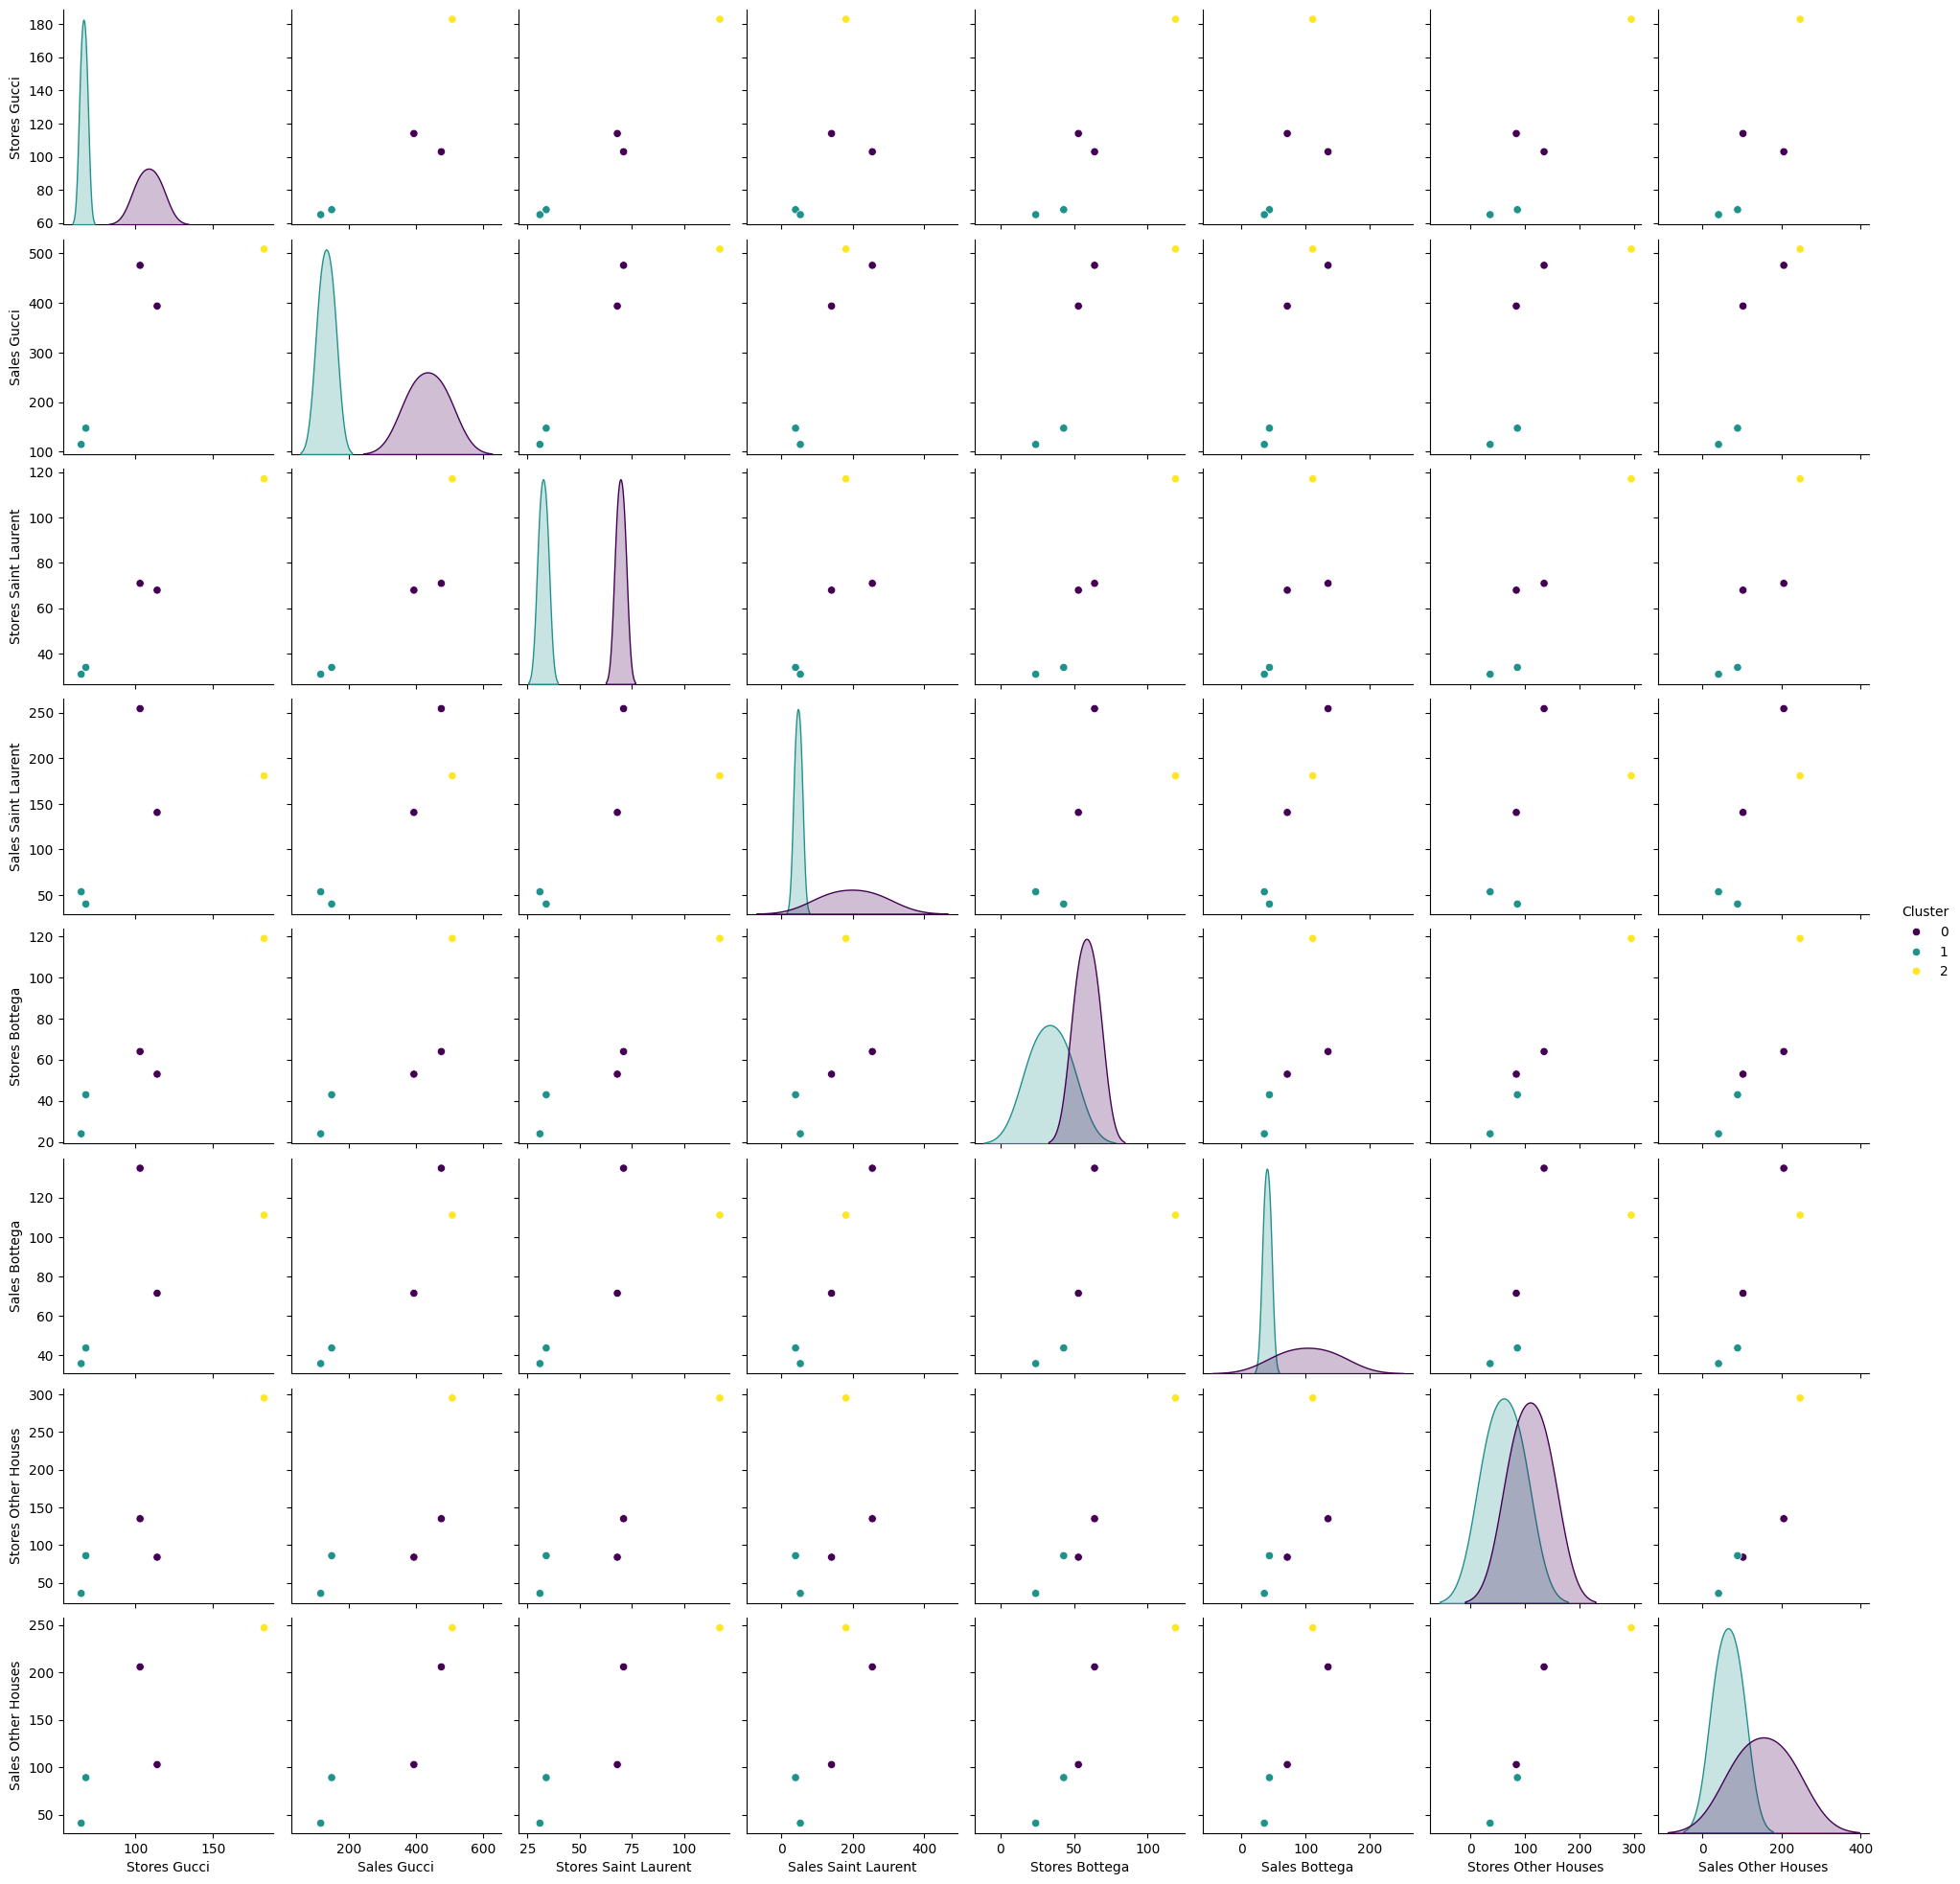

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
sns.pairplot(df.reset_index(), hue="Cluster", vars=df.columns[:-1], palette="viridis")
plt.show()

Repartition of Gucci's store is very good

YSL and Bottega are maybe too much exposed to the Pacific Asia and should consider more Europe and North America

Other Houses are able to capture a lot of Revenue in Japan, their store repartition is very pertinent, we'll come back later to a Kering should use

We added the Other Houses datas to see where are the markets where they are the most present, we'll come back on this point for the last strategy

**Store Openings (2019-2024)**

In [ ]:
 # DataFrame creation
data = {
    "Delta Gucci Store": [17.31, 4.67, -2.83, 10.77, 19.30],
    "Delta Gucci": [-9.11, 7.21, 11.87, 2.54, 43.56],
    "Delta YSL Store": [39.02, 48.84, 50.00, 12.90, 30.00],
    "Delta YSL": [49.98, 67.56, 50.30, 10.82, 106.87],
    "Delta Bottega Store": [6.54, 37.14, -1.67, -8.33, 27.78],
    "Delta Bottega ": [19.71, 84.17, 51.27, 66.45, 9.54]
}
df = pd.DataFrame(data, index=["Pacific Asia", "North America", "Western Europe", "Japan", "Rest of the world"])

# Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

print(df[['Cluster']])

                   Cluster
Pacific Asia             2
North America            0
Western Europe           0
Japan                    1
Rest of the world        2


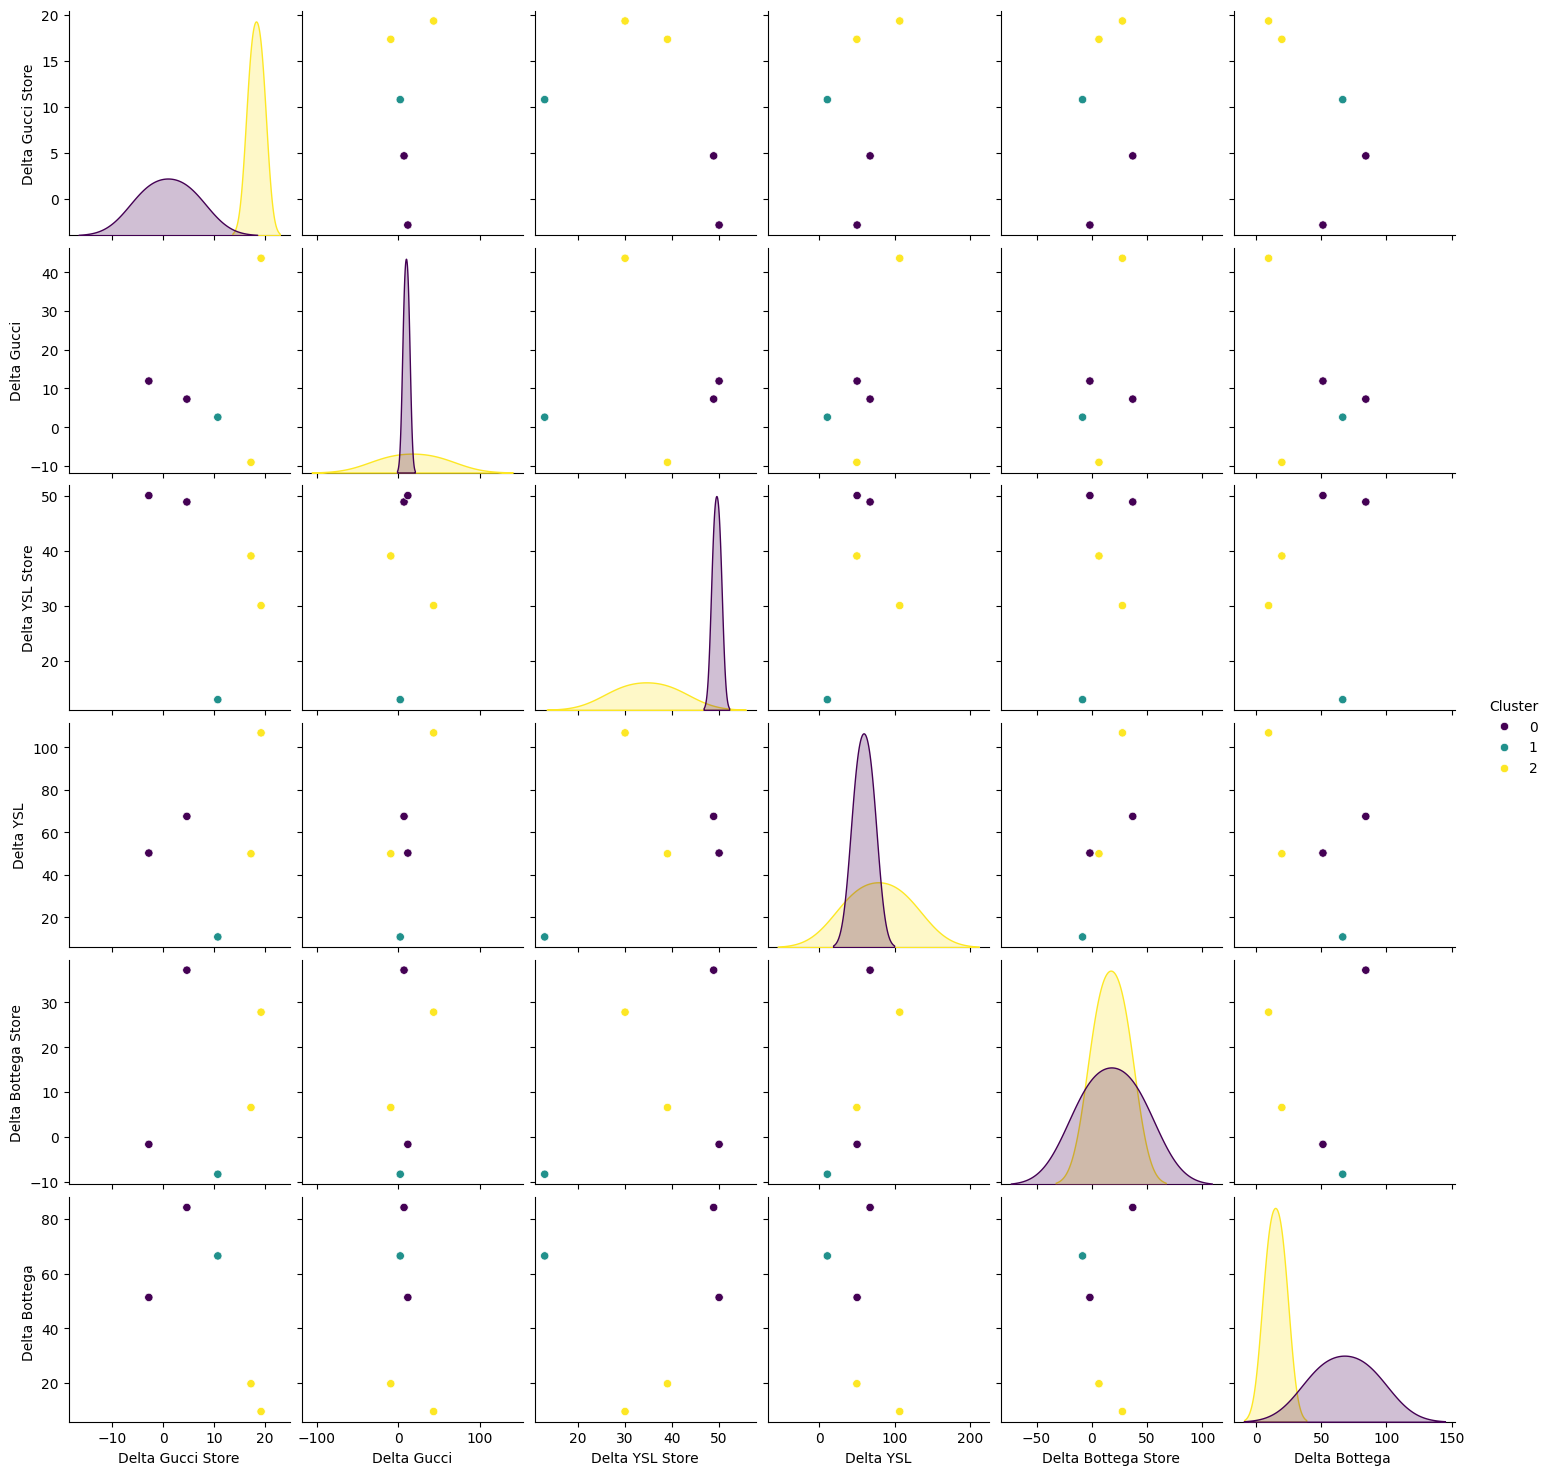

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
sns.pairplot(df.reset_index(), hue="Cluster", vars=df.columns[:-1], palette="viridis")
plt.show()

Gucci: Stagnating with too much store opening

Too much store opening in Japan for Gucci, should be more pertinent for Bottega

**Impulse Response Analysis Gucci**

Gucci: p-value = 0.15704692518232954
Retail sales japon: p-value = 0.04130027386628279
Retail sales chine: p-value = 0.00020371455321089836
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Nov, 2024
Time:                     23:12:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.5019
Nobs:                     16.0000    HQIC:                  -20.2887
Log likelihood:           133.972    FPE:                9.67167e-09
AIC:                     -20.3851    Det(Omega_mle):     1.62430e-09
--------------------------------------------------------------------
Results for equation Gucci
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.026873         0.020798           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


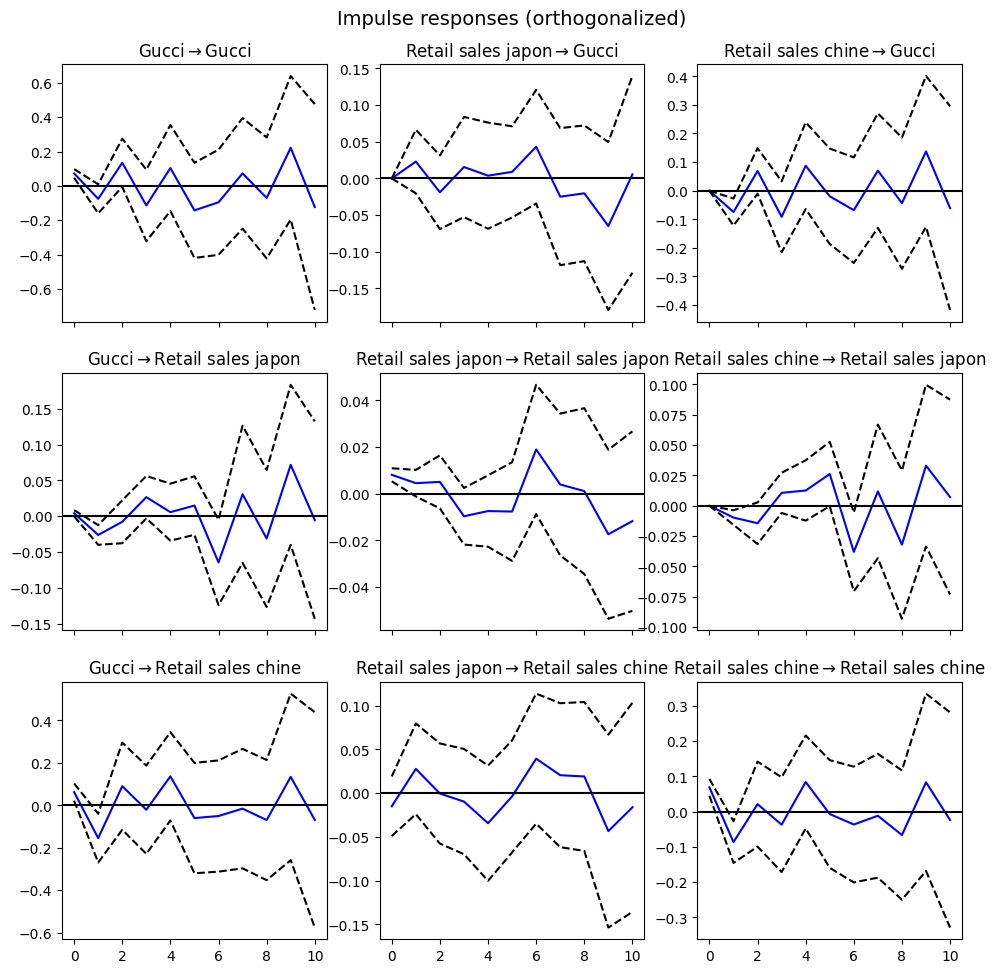

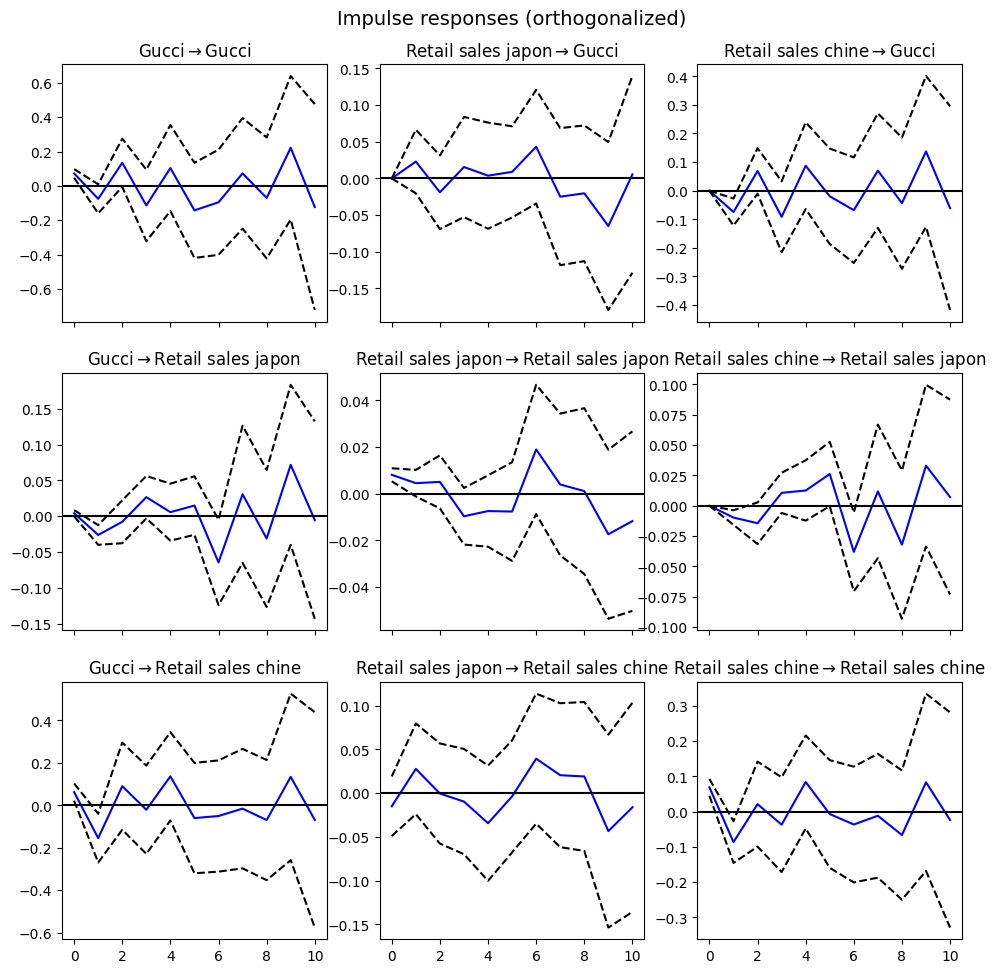

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

data = df[['Gucci', 'Retail sales japon', 'Retail sales chine']].dropna()

for col in data.columns:
    result = adfuller(data[col])
    print(f'{col}: p-value = {result[1]}')

data_diff = data.diff().dropna()


model = VAR(data_diff)
results = model.fit(maxlags=4, ic='aic')


print(results.summary())

irf = results.irf(10)
irf.plot(orth=True)

YSL: Concentre ROW, et garde le même rythme sur Occident

**Impulse Response Analysis YSL**

YSL: p-value = 0.0008465459652683178
Retail sales US: p-value = 0.9209175570835166
Consumer confidence europe : p-value = 0.22036899690005868
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Nov, 2024
Time:                     23:15:51
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -9.06733
Nobs:                     16.0000    HQIC:                  -10.8541
Log likelihood:           58.4951    FPE:                0.000121031
AIC:                     -10.9505    Det(Omega_mle):     2.03265e-05
--------------------------------------------------------------------
Results for equation YSL
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                  0.039157 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


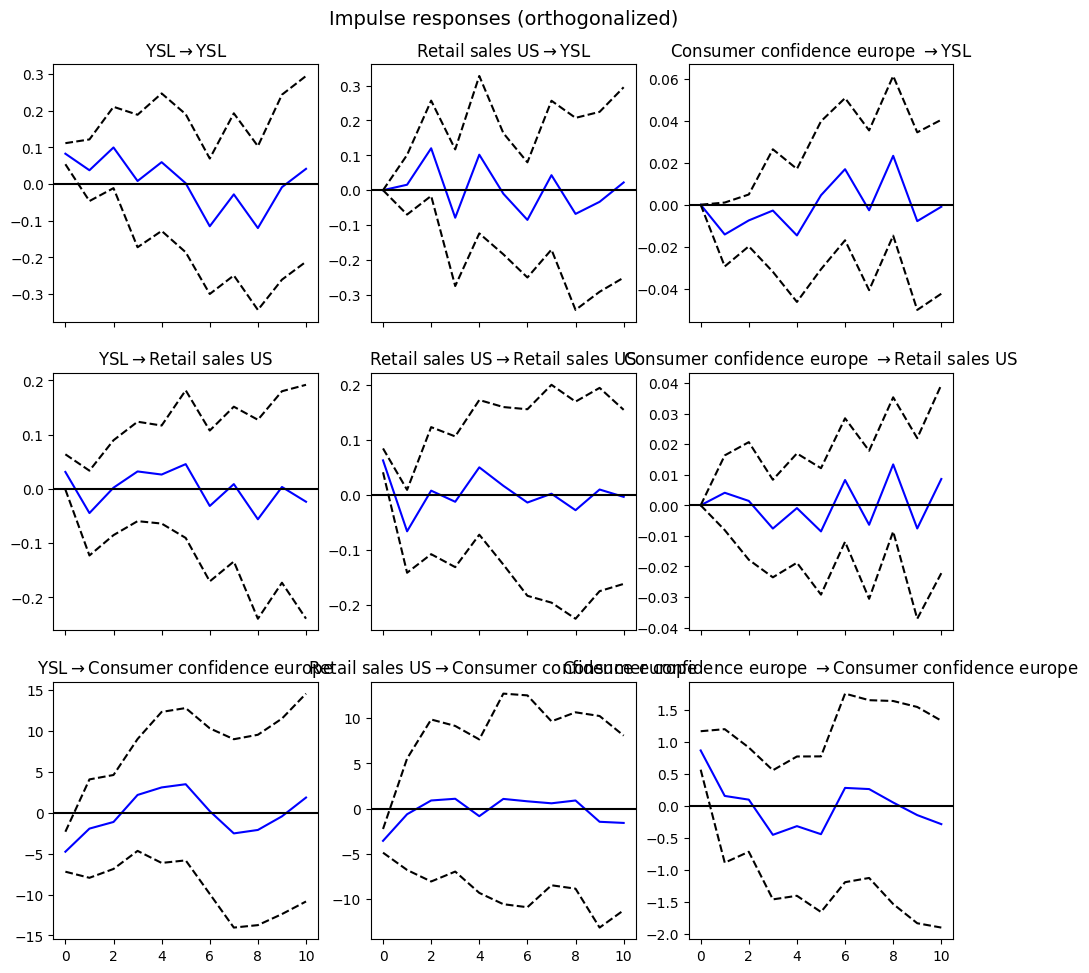

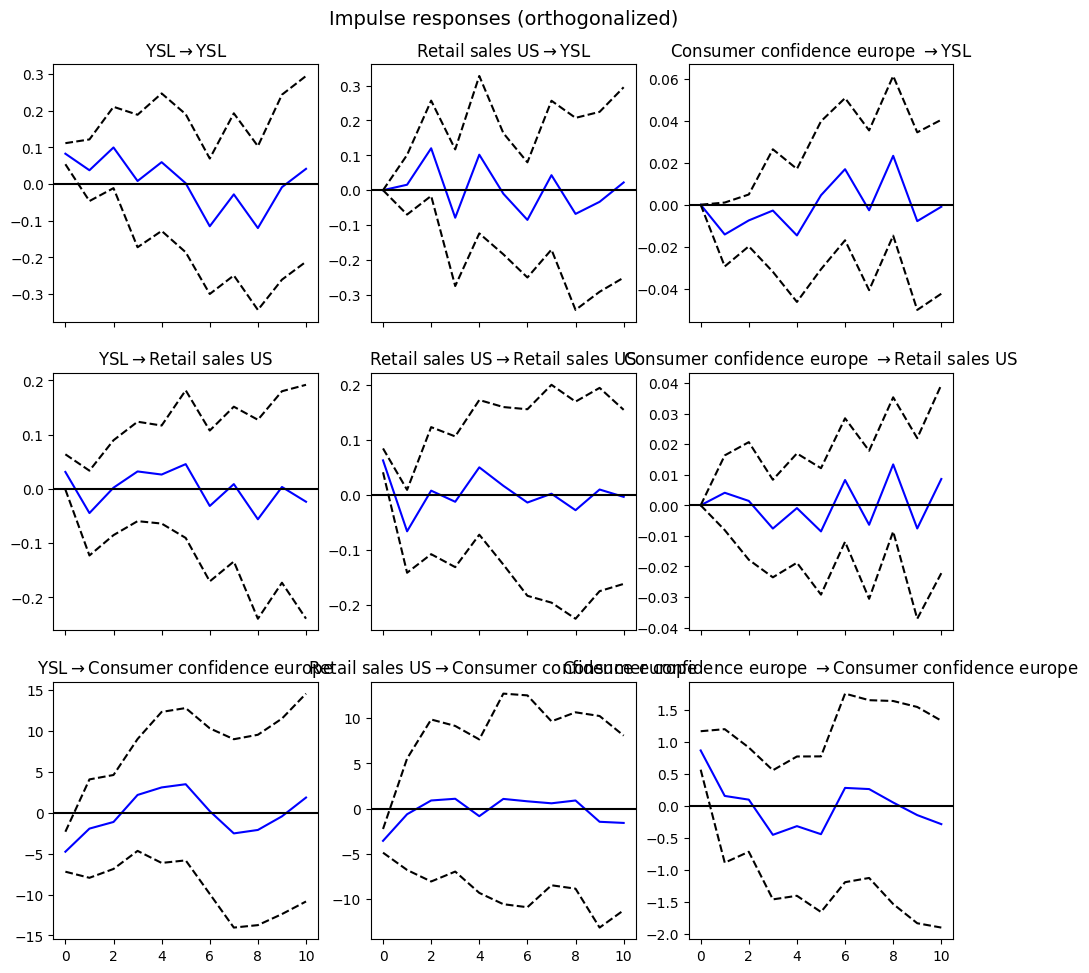

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller


data = df[['YSL', 'Retail sales US', 'Consumer confidence europe ']].dropna()

for col in data.columns:
    result = adfuller(data[col])
    print(f'{col}: p-value = {result[1]}')

data_diff = data.diff().dropna()

model = VAR(data_diff)
results = model.fit(maxlags=4, ic='aic')

print(results.summary())

irf = results.irf(10)
irf.plot(orth=True)

Bottega: Keeps same pace North America but must invest + in Europe; less investment ROW

**Impulse Response Analysis Bottega**

Bottega: p-value = 0.6651998033845947
FED rate: p-value = 0.016100519185230082
EU GDP: p-value = 0.8705403436618063
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Nov, 2024
Time:                     23:12:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -21.8243
Nobs:                     16.0000    HQIC:                  -23.6110
Log likelihood:           160.551    FPE:                3.48844e-10
AIC:                     -23.7074    Det(Omega_mle):     5.85865e-11
--------------------------------------------------------------------
Results for equation Bottega
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.002455         0.021229            0.116           0.908
L1.Bottega         -0.226518 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


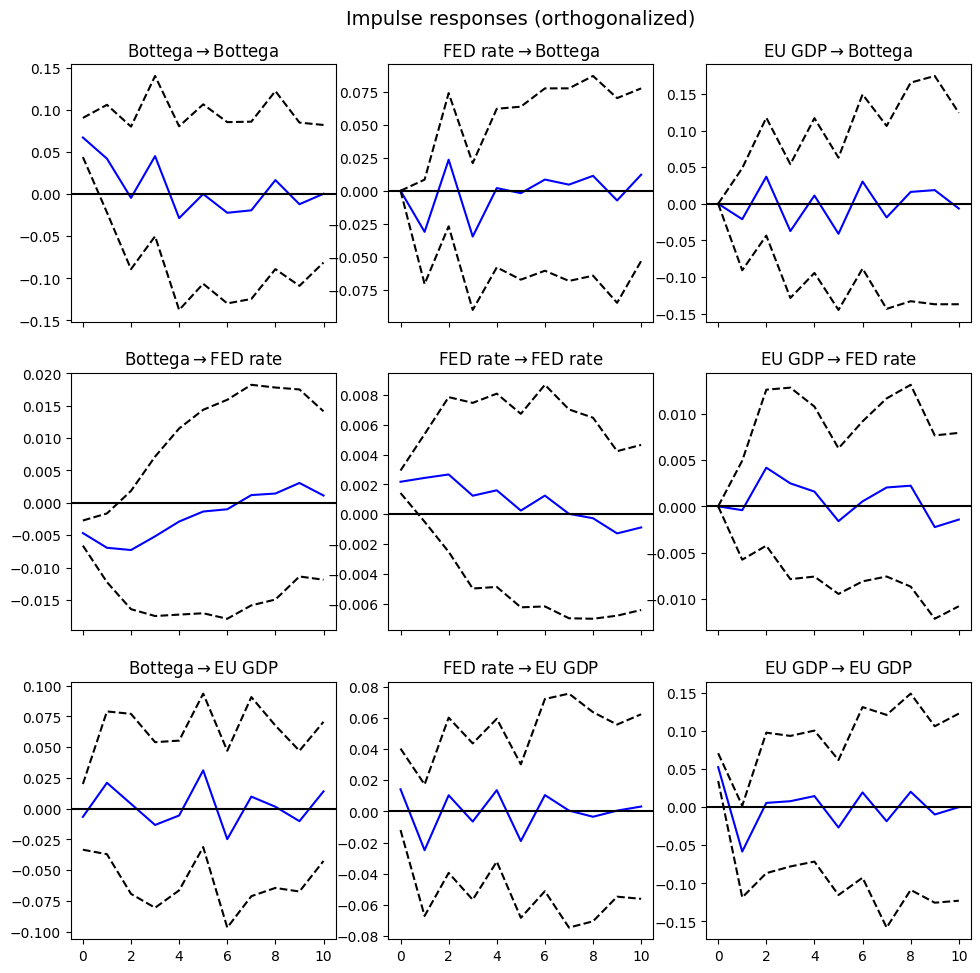

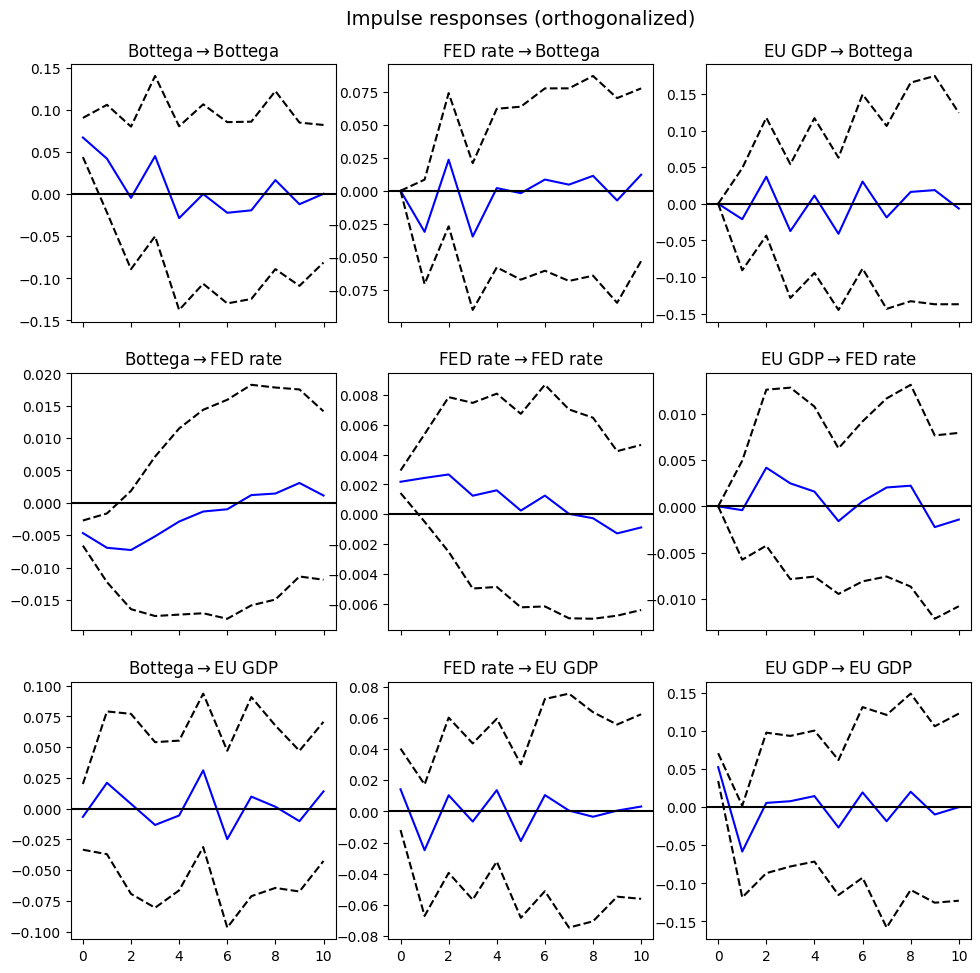

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

data = df[['Bottega', 'FED rate', 'EU GDP']].dropna()

for col in data.columns:
    result = adfuller(data[col])
    print(f'{col}: p-value = {result[1]}')

data_diff = data.diff().dropna()

model = VAR(data_diff)
results = model.fit(maxlags=4, ic='aic')

print(results.summary())

irf = results.irf(10)
irf.plot(orth=True)

**Investment in Brands**

In [ ]:
# DataFrame creation
data = {
    "Revenue Change Gucci": [-6, 8, 30, -23, 16],
    "Gucci Investment": [7, 37, 57, -39, 8],
    "Revenue Change YSL": [-4, 31, 45, -15, 17],
    "YSL Investment": [66, 55, 36, -46, 10],
    "Revenue Change Bottega": [-5, 16, 24, 4, 5],
    "Bottega Investment": [15, 26, 38, -16, -16]
}
df = pd.DataFrame(data, index=["2023", "2022", "2021", "2020", "2019"])

# Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

print(df[['Cluster']])

      Cluster
2023        2
2022        0
2021        0
2020        1
2019        2


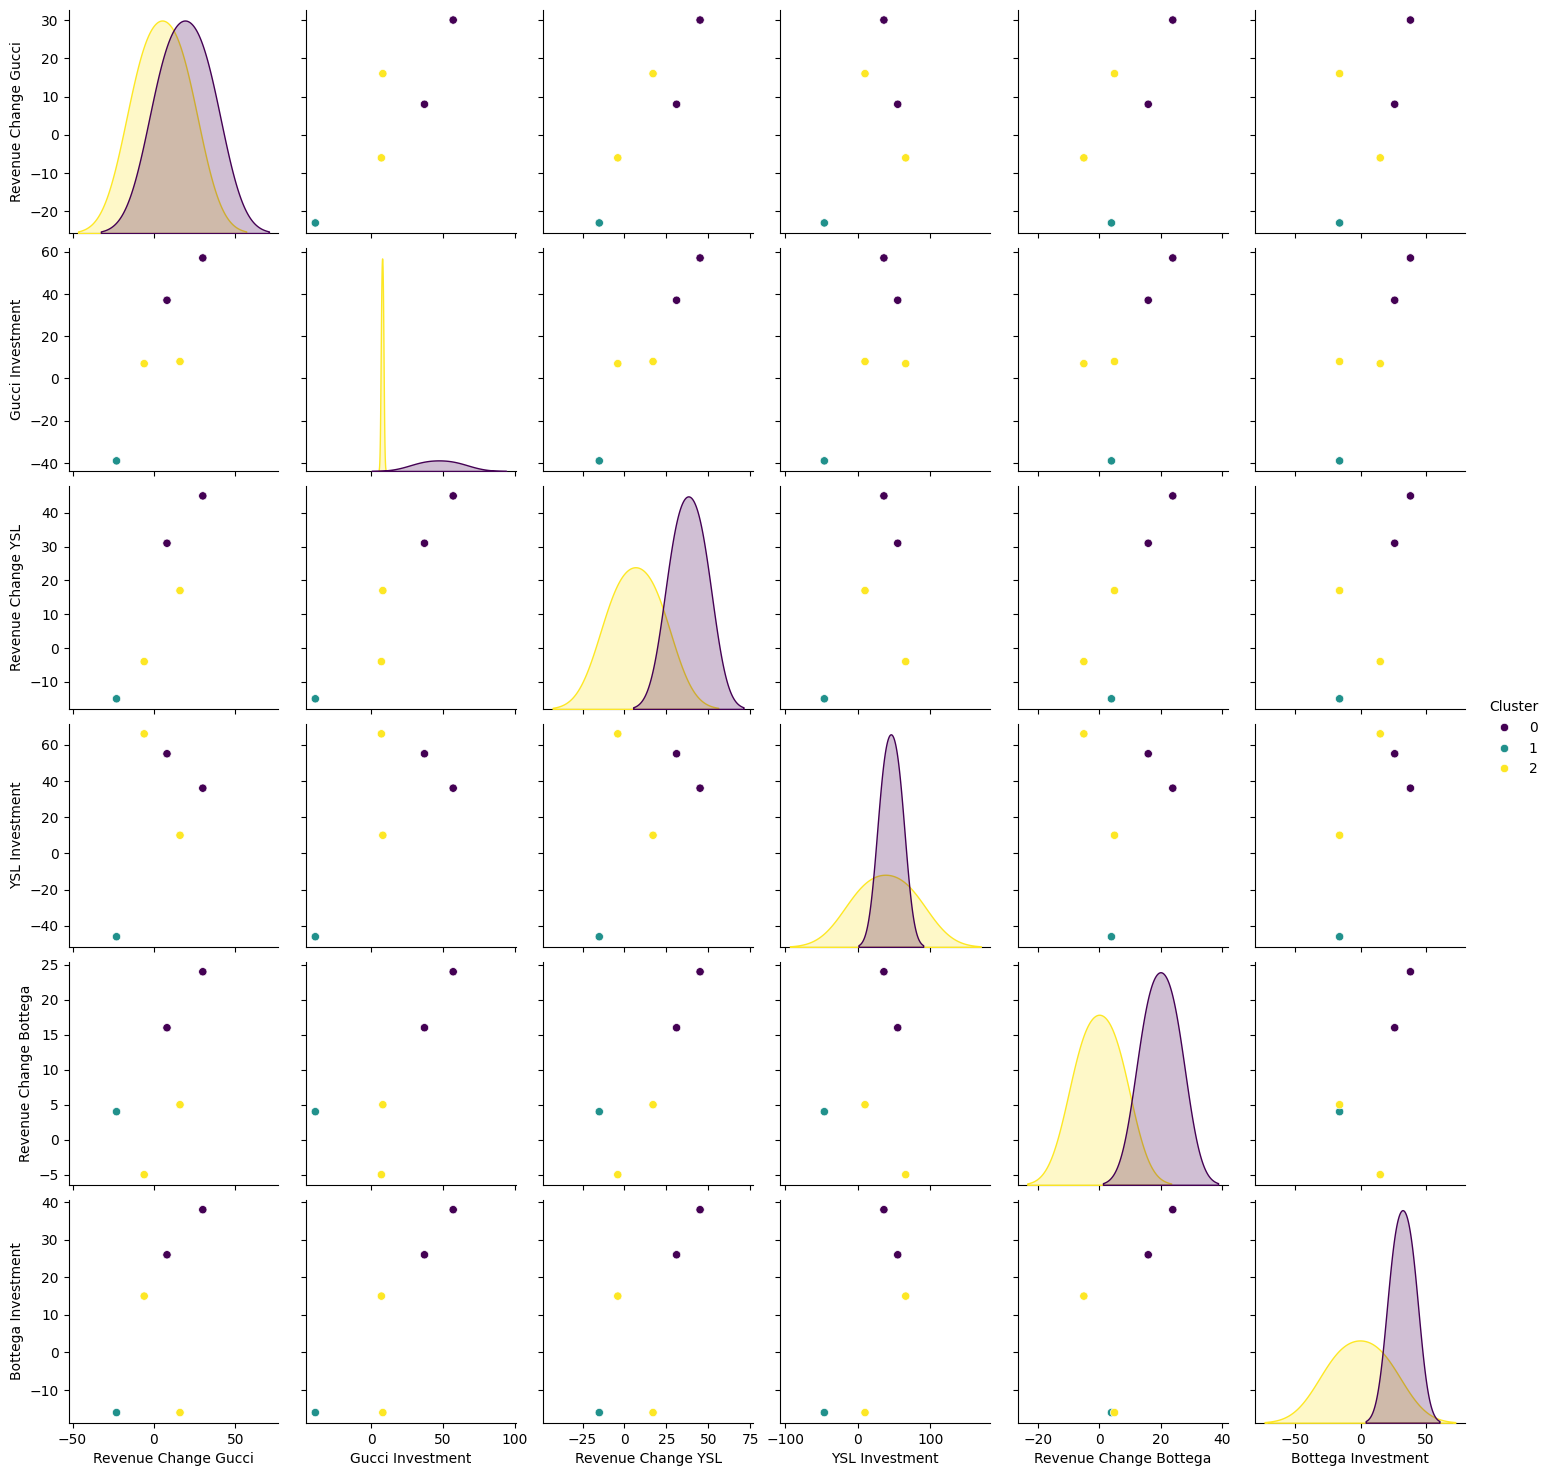

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
sns.pairplot(df.reset_index(), hue="Cluster", vars=df.columns[:-1], palette="viridis")
plt.show()

Investing has been very important for Gucci after Covid Crisis

Also for YSL but last year a lot of investment for no results

Also for Bottega but could have invest more, during Covid Crisis to sustain the growth as it was very resilient

Next strategy: Acquisition:
- Acquisition to complete its geographic presence
- Acquisition to complete its product range


Analysis of the growth of Japan luxury market and luxury watches

Potential Acquisition of Grand Seiko

**Monte-Carlo Simulation Watches Segment**

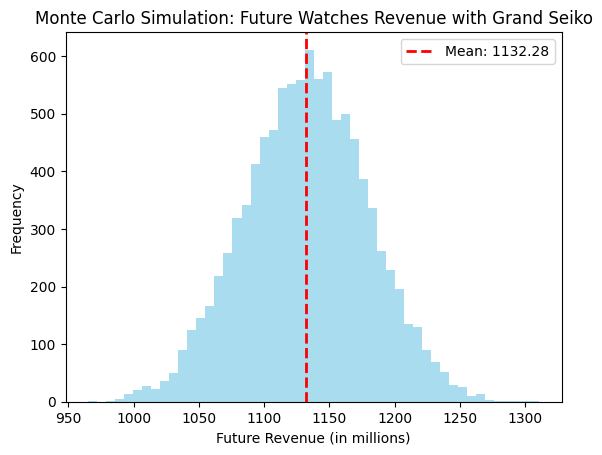

Expected Revenue (mean): 1132.28M
Standard Deviation of Revenue: 47.19M


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Variables
n_simulations = 10000
base_revenue_kering = 914  # Current revenues of watches segment by other houses of Kering's group
growth_rate_kering = 0.12  # Current growth rate of watches segment by other houses of Kering's group
growth_rate_seiko = np.random.normal(0.18, 0.05, n_simulations)  # Estimate growth of Grand Seiko
integration_cost = np.random.uniform(37.15, 74.30, n_simulations)  # We ponderate the total acquisition cost according to the revenue in this segment

# Simulation of futures revenues
future_revenue_kering = base_revenue_kering * (1 + growth_rate_kering)
future_revenue_with_seiko = future_revenue_kering + (growth_rate_seiko * base_revenue_kering) - integration_cost

mean_revenue = np.mean(future_revenue_with_seiko)
std_revenue = np.std(future_revenue_with_seiko)

# Plot
plt.hist(future_revenue_with_seiko, bins=50, color='skyblue', alpha=0.7)
plt.axvline(mean_revenue, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_revenue:.2f}")
plt.title("Monte Carlo Simulation: Future Watches Revenue with Grand Seiko")
plt.xlabel("Future Revenue (in millions)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(f"Expected Revenue (mean): {mean_revenue:.2f}M")
print(f"Standard Deviation of Revenue: {std_revenue:.2f}M")


**Monte-Carlo Simulation Japanese Market**

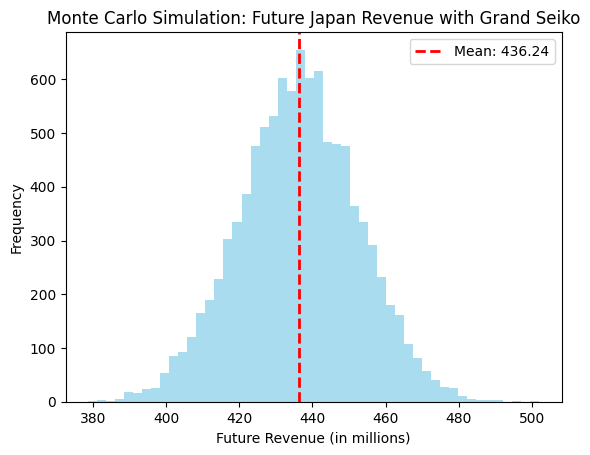

Expected Revenue (mean): 436.24M
Standard Deviation of Revenue: 16.25M


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Variables
n_simulations = 10000
base_revenue_kering = 316  # Current revenue of other houses of Kering's group in Japan
growth_rate_kering = 0.166  # Current growth rate of other houses of Kering's group in Japan
growth_rate_japan = np.random.normal(0.275, 0.05, n_simulations) # Estimated growth rate of Japan luxury market
integration_cost = np.random.uniform(12.85, 25.69, n_simulations) # We ponderate the total acquisition cost according to the revenue in this segment

# Simulation of futures revenues
future_revenue_kering = base_revenue_kering * (1 + growth_rate_kering)
future_revenue_with_seiko = future_revenue_kering + (growth_rate_japan * base_revenue_kering) - integration_cost

mean_revenue = np.mean(future_revenue_with_seiko)
std_revenue = np.std(future_revenue_with_seiko)

# Plot
plt.hist(future_revenue_with_seiko, bins=50, color='skyblue', alpha=0.7)
plt.axvline(mean_revenue, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_revenue:.2f}")
plt.title("Monte Carlo Simulation: Future Japan Revenue with Grand Seiko")
plt.xlabel("Future Revenue (in millions)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(f"Expected Revenue (mean): {mean_revenue:.2f}M")
print(f"Standard Deviation of Revenue: {std_revenue:.2f}M")